In [1]:
#calculo
import numpy as np
import pandas as pd

#grafico
import matplotlib.pyplot as plt
%matplotlib inline

#propios utilitarios
from utils import *

data_perfil = pd.read_csv('data/02dataBasePerfilRec.csv')
data_perfil.head()

codCliente rangoEdad rangoIngreso  flagGenero  flagLimaProvCliente  \
0       24041    Rango2       Rango2           1                    0   
1        9040    Rango4       Rango6           1                    1   
2       18233    Rango2       Rango1           1                    1   
3        7226    Rango5       Rango3           0                    1   
4       21617    Rango3       Rango2           1                    1   

   ubigeoCliente rangoCtdProdAct rangoCtdProdPas rangoCtdProdSeg  flagBxi  \
0          360.0          Rango1          Rango1          Rango1        1   
1          260.0          Rango1          Rango1          Rango1        1   
2          273.0          Rango1          Rango2          Rango1        1   
3          241.0          Rango1          Rango2          Rango1        1   
4          268.0          Rango1          Rango1          Rango1        0   

  saldoTcEntidad1 saldoTcEntidad2 saldoTcEntidad3 saldoTcEntidad4  
0             NaN             NaN             NaN             NaN  
1          Rango1          Rango1          Rango1          Rango1  
2          Rango2          Rango1          Rango1          Rango1  
3          Rango1          Rango2          Rango1          Rango2  
4             NaN             NaN             NaN             NaN

# TRATAMIENTO DE NULOS

### 1. Conteo

In [2]:
null_verificator(data_perfil)

Nulos  Cantidad Tipo Col
codCliente           False         0    int64
rangoEdad             True        57   object
rangoIngreso          True      1263   object
flagGenero           False         0    int64
flagLimaProvCliente  False         0    int64
ubigeoCliente         True         4  float64
rangoCtdProdAct      False         0   object
rangoCtdProdPas      False         0   object
rangoCtdProdSeg      False         0   object
flagBxi              False         0    int64
saldoTcEntidad1       True      6426   object
saldoTcEntidad2       True      6426   object
saldoTcEntidad3       True      6426   object
saldoTcEntidad4       True      6426   object

### 2. Frecuencias

In [3]:
data_perfil['rangoIngreso'].value_counts(dropna=False)

Rango1    11003
Rango3     5241
Rango2     4533
Rango6     3930
Rango4     2516
Rango5     1514
NaN        1263
Name: rangoIngreso, dtype: int64

In [4]:
data_perfil['rangoEdad'].value_counts(dropna=False)

Rango5    6193
Rango6    5583
Rango2    5489
Rango3    5055
Rango4    4308
Rango1    3315
NaN         57
Name: rangoEdad, dtype: int64

In [5]:
data_perfil['saldoTcEntidad1'].value_counts(dropna=False)

Rango1    15429
NaN        6426
Rango3     2076
Rango2     1731
Rango4     1713
Rango6     1571
Rango5     1054
Name: saldoTcEntidad1, dtype: int64

In [6]:
data_perfil['saldoTcEntidad2'].value_counts(dropna=False)

Rango1    18084
NaN        6426
Rango2     2313
Rango3     1494
Rango5      949
Rango4      734
Name: saldoTcEntidad2, dtype: int64

In [7]:
data_perfil['saldoTcEntidad3'].value_counts(dropna=False)

Rango1    20718
NaN        6426
Rango6      729
Rango2      571
Rango3      561
Rango5      518
Rango4      477
Name: saldoTcEntidad3, dtype: int64

In [8]:
data_perfil['saldoTcEntidad4'].value_counts(dropna=False)

Rango1    18910
NaN        6426
Rango2     1096
Rango3      998
Rango6      975
Rango5      818
Rango4      777
Name: saldoTcEntidad4, dtype: int64

In [9]:
data_perfil['ubigeoCliente'].value_counts(dropna=False).sort_index()[:10]

2.0      5
3.0      1
4.0      1
5.0      3
6.0     39
7.0     23
8.0      1
9.0      2
10.0     1
Name: ubigeoCliente, dtype: int64

In [10]:
data_perfil.loc[data_perfil['saldoTcEntidad4'].isnull()][['saldoTcEntidad4', 'saldoTcEntidad3', 'saldoTcEntidad2', 'saldoTcEntidad1']].shape

(6426, 4)

In [11]:
data_perfil.loc[data_perfil['saldoTcEntidad4'].notnull()][['saldoTcEntidad4', 'saldoTcEntidad3', 'saldoTcEntidad2', 'saldoTcEntidad1']][100:110]

saldoTcEntidad4 saldoTcEntidad3 saldoTcEntidad2 saldoTcEntidad1
137          Rango6          Rango1          Rango1          Rango1
139          Rango1          Rango1          Rango1          Rango2
142          Rango5          Rango1          Rango1          Rango1
143          Rango1          Rango1          Rango1          Rango1
144          Rango1          Rango1          Rango1          Rango1
145          Rango2          Rango1          Rango1          Rango1
146          Rango1          Rango1          Rango4          Rango1
147          Rango1          Rango1          Rango1          Rango5
148          Rango6          Rango1          Rango2          Rango5
151          Rango1          Rango1          Rango2          Rango2

In [12]:
data_perfil.loc[data_perfil['ubigeoCliente'].isnull()][['saldoTcEntidad4', 'saldoTcEntidad3', 'saldoTcEntidad2', 'saldoTcEntidad1']]

saldoTcEntidad4 saldoTcEntidad3 saldoTcEntidad2 saldoTcEntidad1
6738              NaN             NaN             NaN             NaN
12676          Rango1          Rango1          Rango1          Rango5
20778             NaN             NaN             NaN             NaN
29875             NaN             NaN             NaN             NaN

In [13]:
sorted(data_perfil['ubigeoCliente'].unique())[:5]

[2.0, 4.0, 9.0, 11.0, 15.0]

### 3. Imputacion por un nuevo tipo (cualitativo)

In [14]:
data_perfil['ubigeoCliente'].fillna(0, inplace=True)

In [15]:

for col in [_ for _ in data_perfil.columns if data_perfil[_].isnull().any()]:
    print(col)
    data_perfil[col].fillna('Rango0', inplace=True)

rangoEdad
rangoIngreso
saldoTcEntidad1
saldoTcEntidad2
saldoTcEntidad3
saldoTcEntidad4


In [16]:
null_verificator(data_perfil)

'DATA LIMPIA DE NULOS'

# CONVERSION A VARIABLES NUMERICAS Y DUMMIES

In [17]:
data_perfil.select_dtypes(include=['object']).head()

rangoEdad rangoIngreso rangoCtdProdAct rangoCtdProdPas rangoCtdProdSeg  \
0    Rango2       Rango2          Rango1          Rango1          Rango1   
1    Rango4       Rango6          Rango1          Rango1          Rango1   
2    Rango2       Rango1          Rango1          Rango2          Rango1   
3    Rango5       Rango3          Rango1          Rango2          Rango1   
4    Rango3       Rango2          Rango1          Rango1          Rango1   

  saldoTcEntidad1 saldoTcEntidad2 saldoTcEntidad3 saldoTcEntidad4  
0          Rango0          Rango0          Rango0          Rango0  
1          Rango1          Rango1          Rango1          Rango1  
2          Rango2          Rango1          Rango1          Rango1  
3          Rango1          Rango2          Rango1          Rango2  
4          Rango0          Rango0          Rango0          Rango0

In [18]:
for col in data_perfil.select_dtypes(include=['object']):
    print(col, sorted(data_perfil[col].unique()))

rangoEdad ['Rango0', 'Rango1', 'Rango2', 'Rango3', 'Rango4', 'Rango5', 'Rango6']
rangoIngreso ['Rango0', 'Rango1', 'Rango2', 'Rango3', 'Rango4', 'Rango5', 'Rango6']
rangoCtdProdAct ['Rango1', 'Rango2', 'Rango3']
rangoCtdProdPas ['Rango1', 'Rango2', 'Rango3']
rangoCtdProdSeg ['Rango1', 'Rango2', 'Rango3', 'Rango4']
saldoTcEntidad1 ['Rango0', 'Rango1', 'Rango2', 'Rango3', 'Rango4', 'Rango5', 'Rango6']
saldoTcEntidad2 ['Rango0', 'Rango1', 'Rango2', 'Rango3', 'Rango4', 'Rango5']
saldoTcEntidad3 ['Rango0', 'Rango1', 'Rango2', 'Rango3', 'Rango4', 'Rango5', 'Rango6']
saldoTcEntidad4 ['Rango0', 'Rango1', 'Rango2', 'Rango3', 'Rango4', 'Rango5', 'Rango6']


In [19]:
data_perfil = pd.get_dummies(data_perfil)
print(list(data_perfil.columns))

['codCliente', 'flagGenero', 'flagLimaProvCliente', 'ubigeoCliente', 'flagBxi', 'rangoEdad_Rango0', 'rangoEdad_Rango1', 'rangoEdad_Rango2', 'rangoEdad_Rango3', 'rangoEdad_Rango4', 'rangoEdad_Rango5', 'rangoEdad_Rango6', 'rangoIngreso_Rango0', 'rangoIngreso_Rango1', 'rangoIngreso_Rango2', 'rangoIngreso_Rango3', 'rangoIngreso_Rango4', 'rangoIngreso_Rango5', 'rangoIngreso_Rango6', 'rangoCtdProdAct_Rango1', 'rangoCtdProdAct_Rango2', 'rangoCtdProdAct_Rango3', 'rangoCtdProdPas_Rango1', 'rangoCtdProdPas_Rango2', 'rangoCtdProdPas_Rango3', 'rangoCtdProdSeg_Rango1', 'rangoCtdProdSeg_Rango2', 'rangoCtdProdSeg_Rango3', 'rangoCtdProdSeg_Rango4', 'saldoTcEntidad1_Rango0', 'saldoTcEntidad1_Rango1', 'saldoTcEntidad1_Rango2', 'saldoTcEntidad1_Rango3', 'saldoTcEntidad1_Rango4', 'saldoTcEntidad1_Rango5', 'saldoTcEntidad1_Rango6', 'saldoTcEntidad2_Rango0', 'saldoTcEntidad2_Rango1', 'saldoTcEntidad2_Rango2', 'saldoTcEntidad2_Rango3', 'saldoTcEntidad2_Rango4', 'saldoTcEntidad2_Rango5', 'saldoTcEntidad3_Rang

In [20]:
data_perfil.head()

codCliente  flagGenero  flagLimaProvCliente  ubigeoCliente  flagBxi  \
0       24041           1                    0          360.0        1   
1        9040           1                    1          260.0        1   
2       18233           1                    1          273.0        1   
3        7226           0                    1          241.0        1   
4       21617           1                    1          268.0        0   

   rangoEdad_Rango0  rangoEdad_Rango1  rangoEdad_Rango2  rangoEdad_Rango3  \
0                 0                 0                 1                 0   
1                 0                 0                 0                 0   
2                 0                 0                 1                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 1   

   rangoEdad_Rango4           ...            saldoTcEntidad3_Rango4  \
0                 0           ...                                 0   
1                 1           ...                                 0   
2                 0           ...                                 0   
3                 0           ...                                 0   
4                 0           ...                                 0   

   saldoTcEntidad3_Rango5  saldoTcEntidad3_Rango6  saldoTcEntidad4_Rango0  \
0                       0                       0                       1   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       1   

   saldoTcEntidad4_Rango1  saldoTcEntidad4_Rango2  saldoTcEntidad4_Rango3  \
0                       0                       0                       0   
1                       1                       0                       0   
2                       1                       0                       0   
3                       0                       1                       0   
4                       0                       0                       0   

   saldoTcEntidad4_Rango4  saldoTcEntidad4_Rango5  saldoTcEntidad4_Rango6  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
3                       0                       0                       0  
4                       0                       0                       0  

[5 rows x 56 columns]

In [21]:
data_perfil = reduce_size_data(data_perfil, category=False, default='integer')

Tamaño de uso actual :  2.603607177734375 MB
-> Int 64 Detected
     codCliente
     flagGenero
     flagLimaProvCliente
     flagBxi
-> Float 64 Detected
     ubigeoCliente
Tamaño de uso final :  1.6594696044921875 MB


In [22]:
data_perfil.dtypes

codCliente                int16
flagGenero                 int8
flagLimaProvCliente        int8
ubigeoCliente             int16
flagBxi                    int8
rangoEdad_Rango0          uint8
rangoEdad_Rango1          uint8
rangoEdad_Rango2          uint8
rangoEdad_Rango3          uint8
rangoEdad_Rango4          uint8
rangoEdad_Rango5          uint8
rangoEdad_Rango6          uint8
rangoIngreso_Rango0       uint8
rangoIngreso_Rango1       uint8
rangoIngreso_Rango2       uint8
rangoIngreso_Rango3       uint8
rangoIngreso_Rango4       uint8
rangoIngreso_Rango5       uint8
rangoIngreso_Rango6       uint8
rangoCtdProdAct_Rango1    uint8
rangoCtdProdAct_Rango2    uint8
rangoCtdProdAct_Rango3    uint8
rangoCtdProdPas_Rango1    uint8
rangoCtdProdPas_Rango2    uint8
rangoCtdProdPas_Rango3    uint8
rangoCtdProdSeg_Rango1    uint8
rangoCtdProdSeg_Rango2    uint8
rangoCtdProdSeg_Rango3    uint8
rangoCtdProdSeg_Rango4    uint8
saldoTcEntidad1_Rango0    uint8
saldoTcEntidad1_Rango1    uint8
saldoTcE

# Analisis de Correlacion

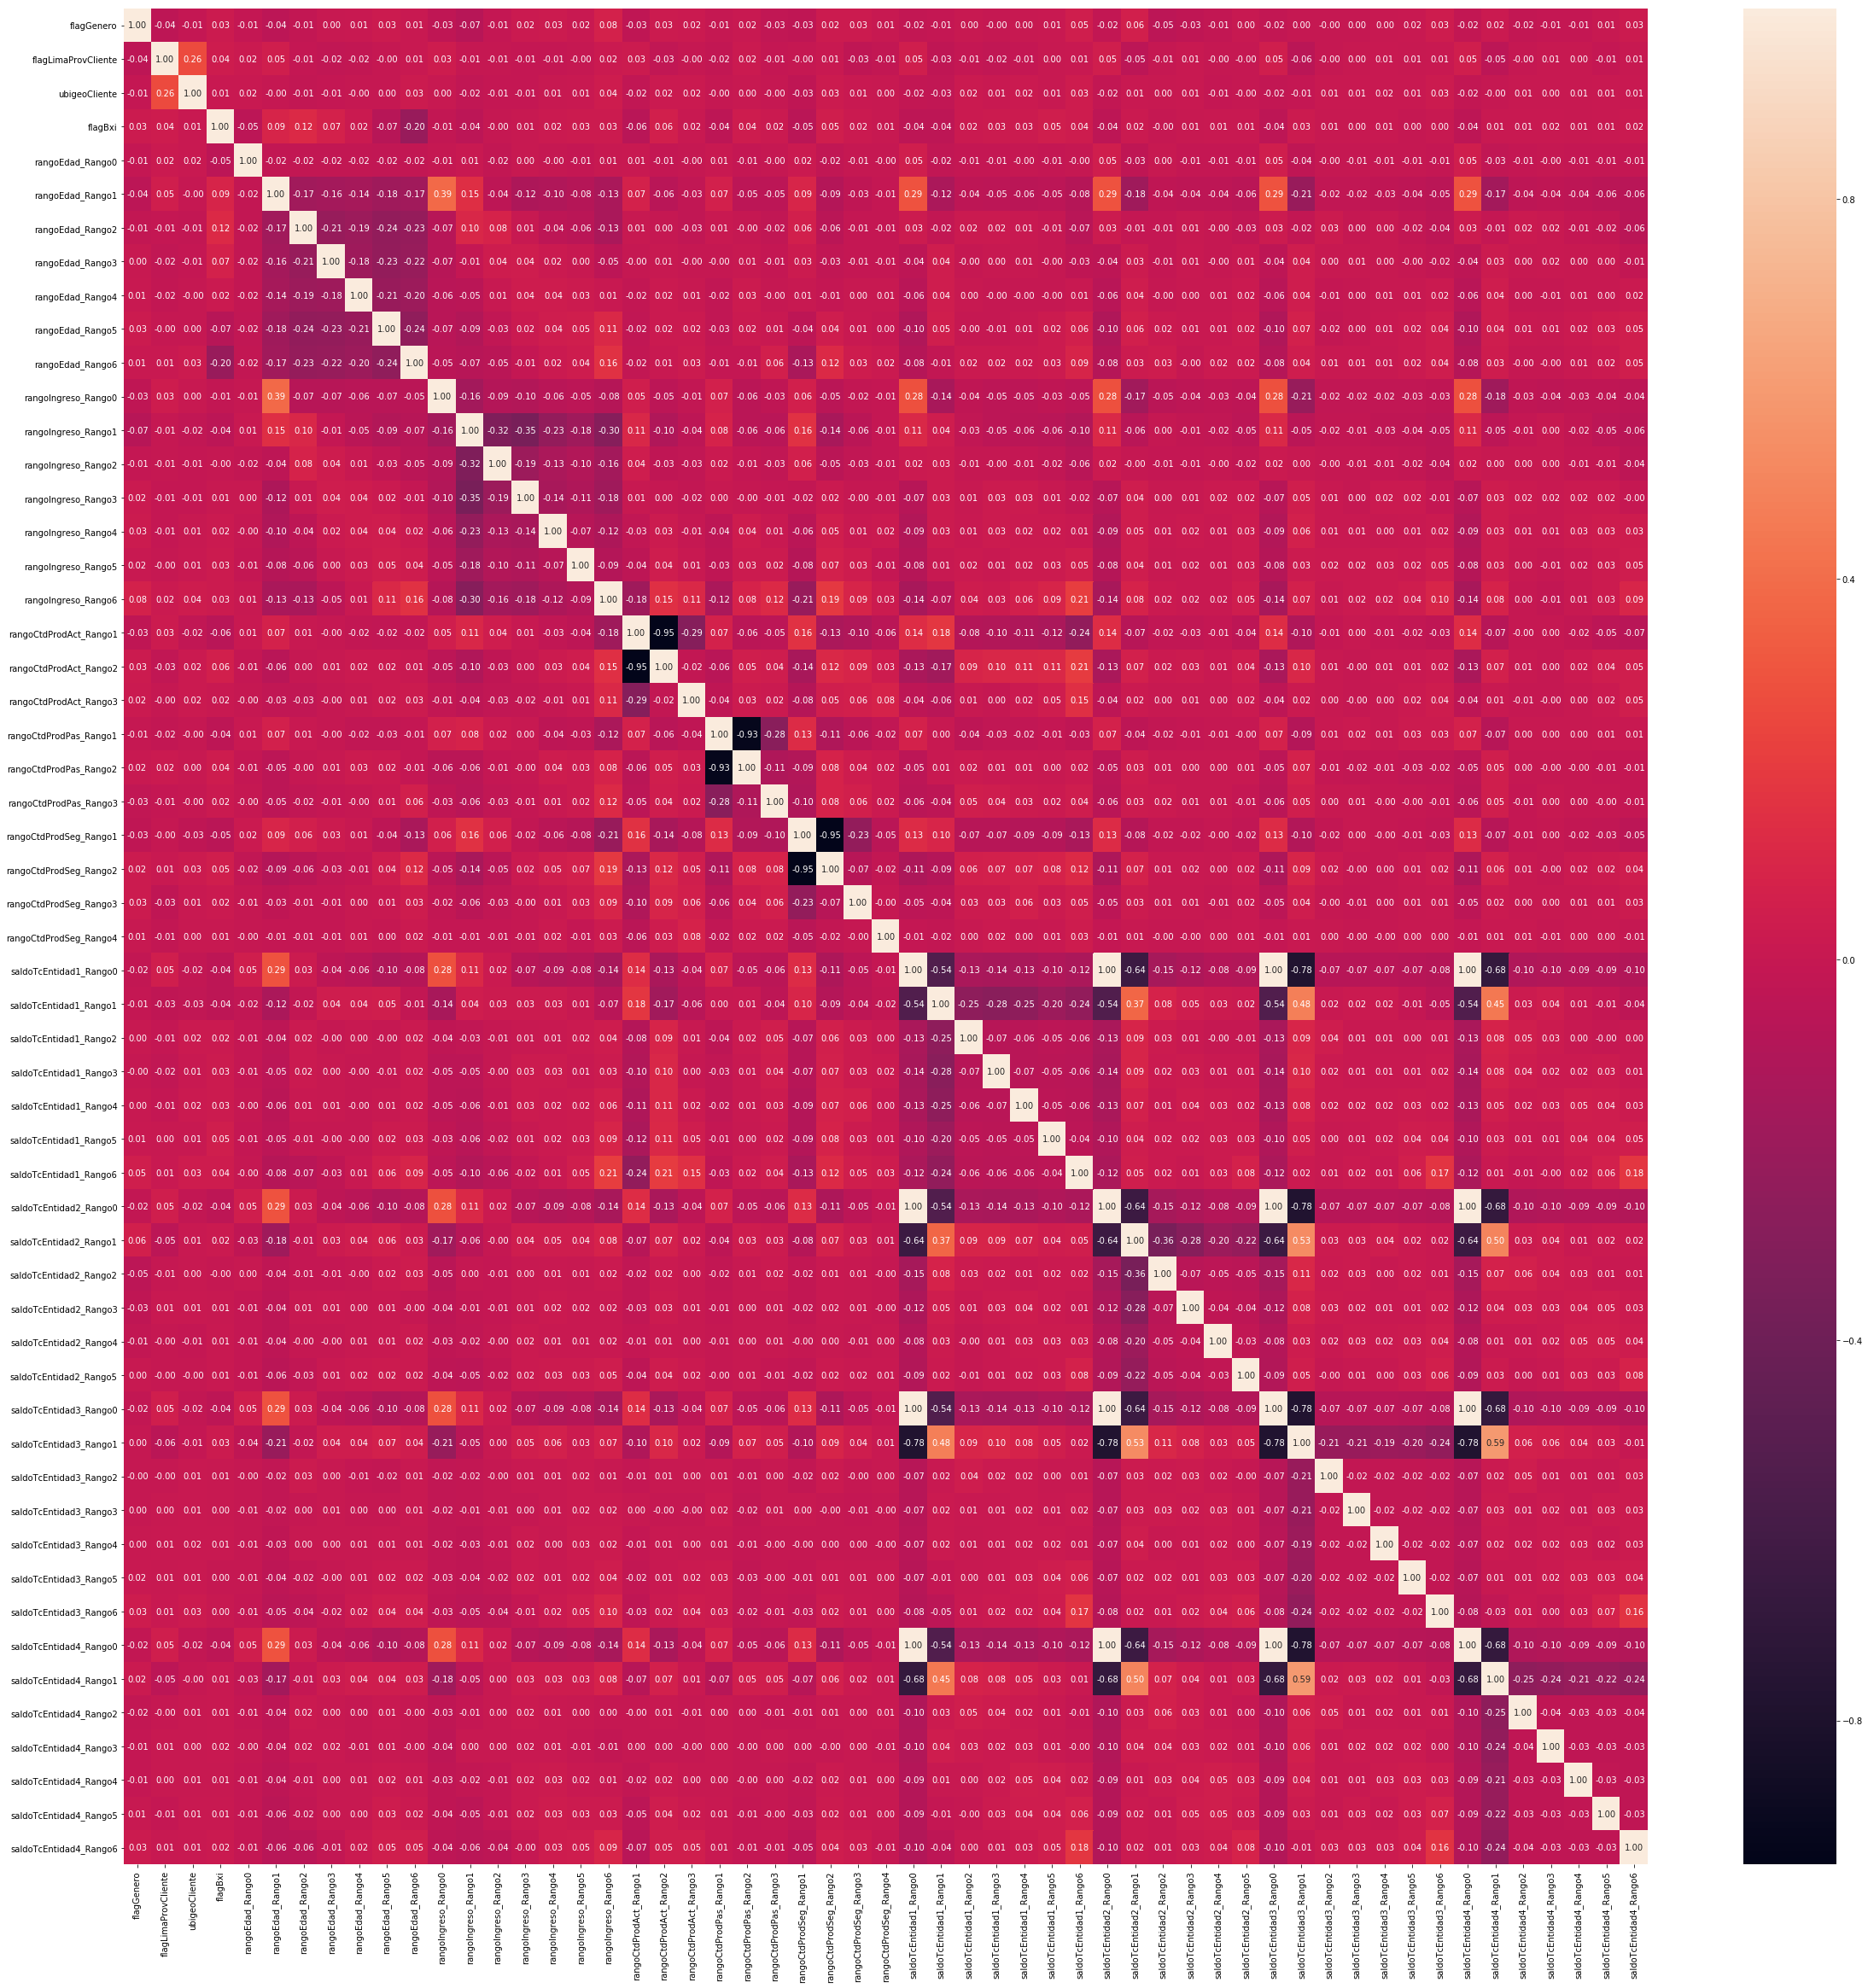

In [22]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(data_perfil.iloc[:,1:].corr('spearman'), annot=True, fmt=".2f", ax=ax)

In [23]:
#Eliminamos una columna por dummie por motivos de evitar
#DEPENDENCIA ENTRE ESTOS MISMOS

del data_perfil['rangoEdad_Rango0']
del data_perfil['rangoIngreso_Rango0']
del data_perfil['rangoCtdProdAct_Rango2']
del data_perfil['rangoCtdProdPas_Rango2']
del data_perfil['rangoCtdProdSeg_Rango2']
del data_perfil['saldoTcEntidad1_Rango0']
del data_perfil['saldoTcEntidad2_Rango0']
del data_perfil['saldoTcEntidad3_Rango0']
del data_perfil['saldoTcEntidad4_Rango0']

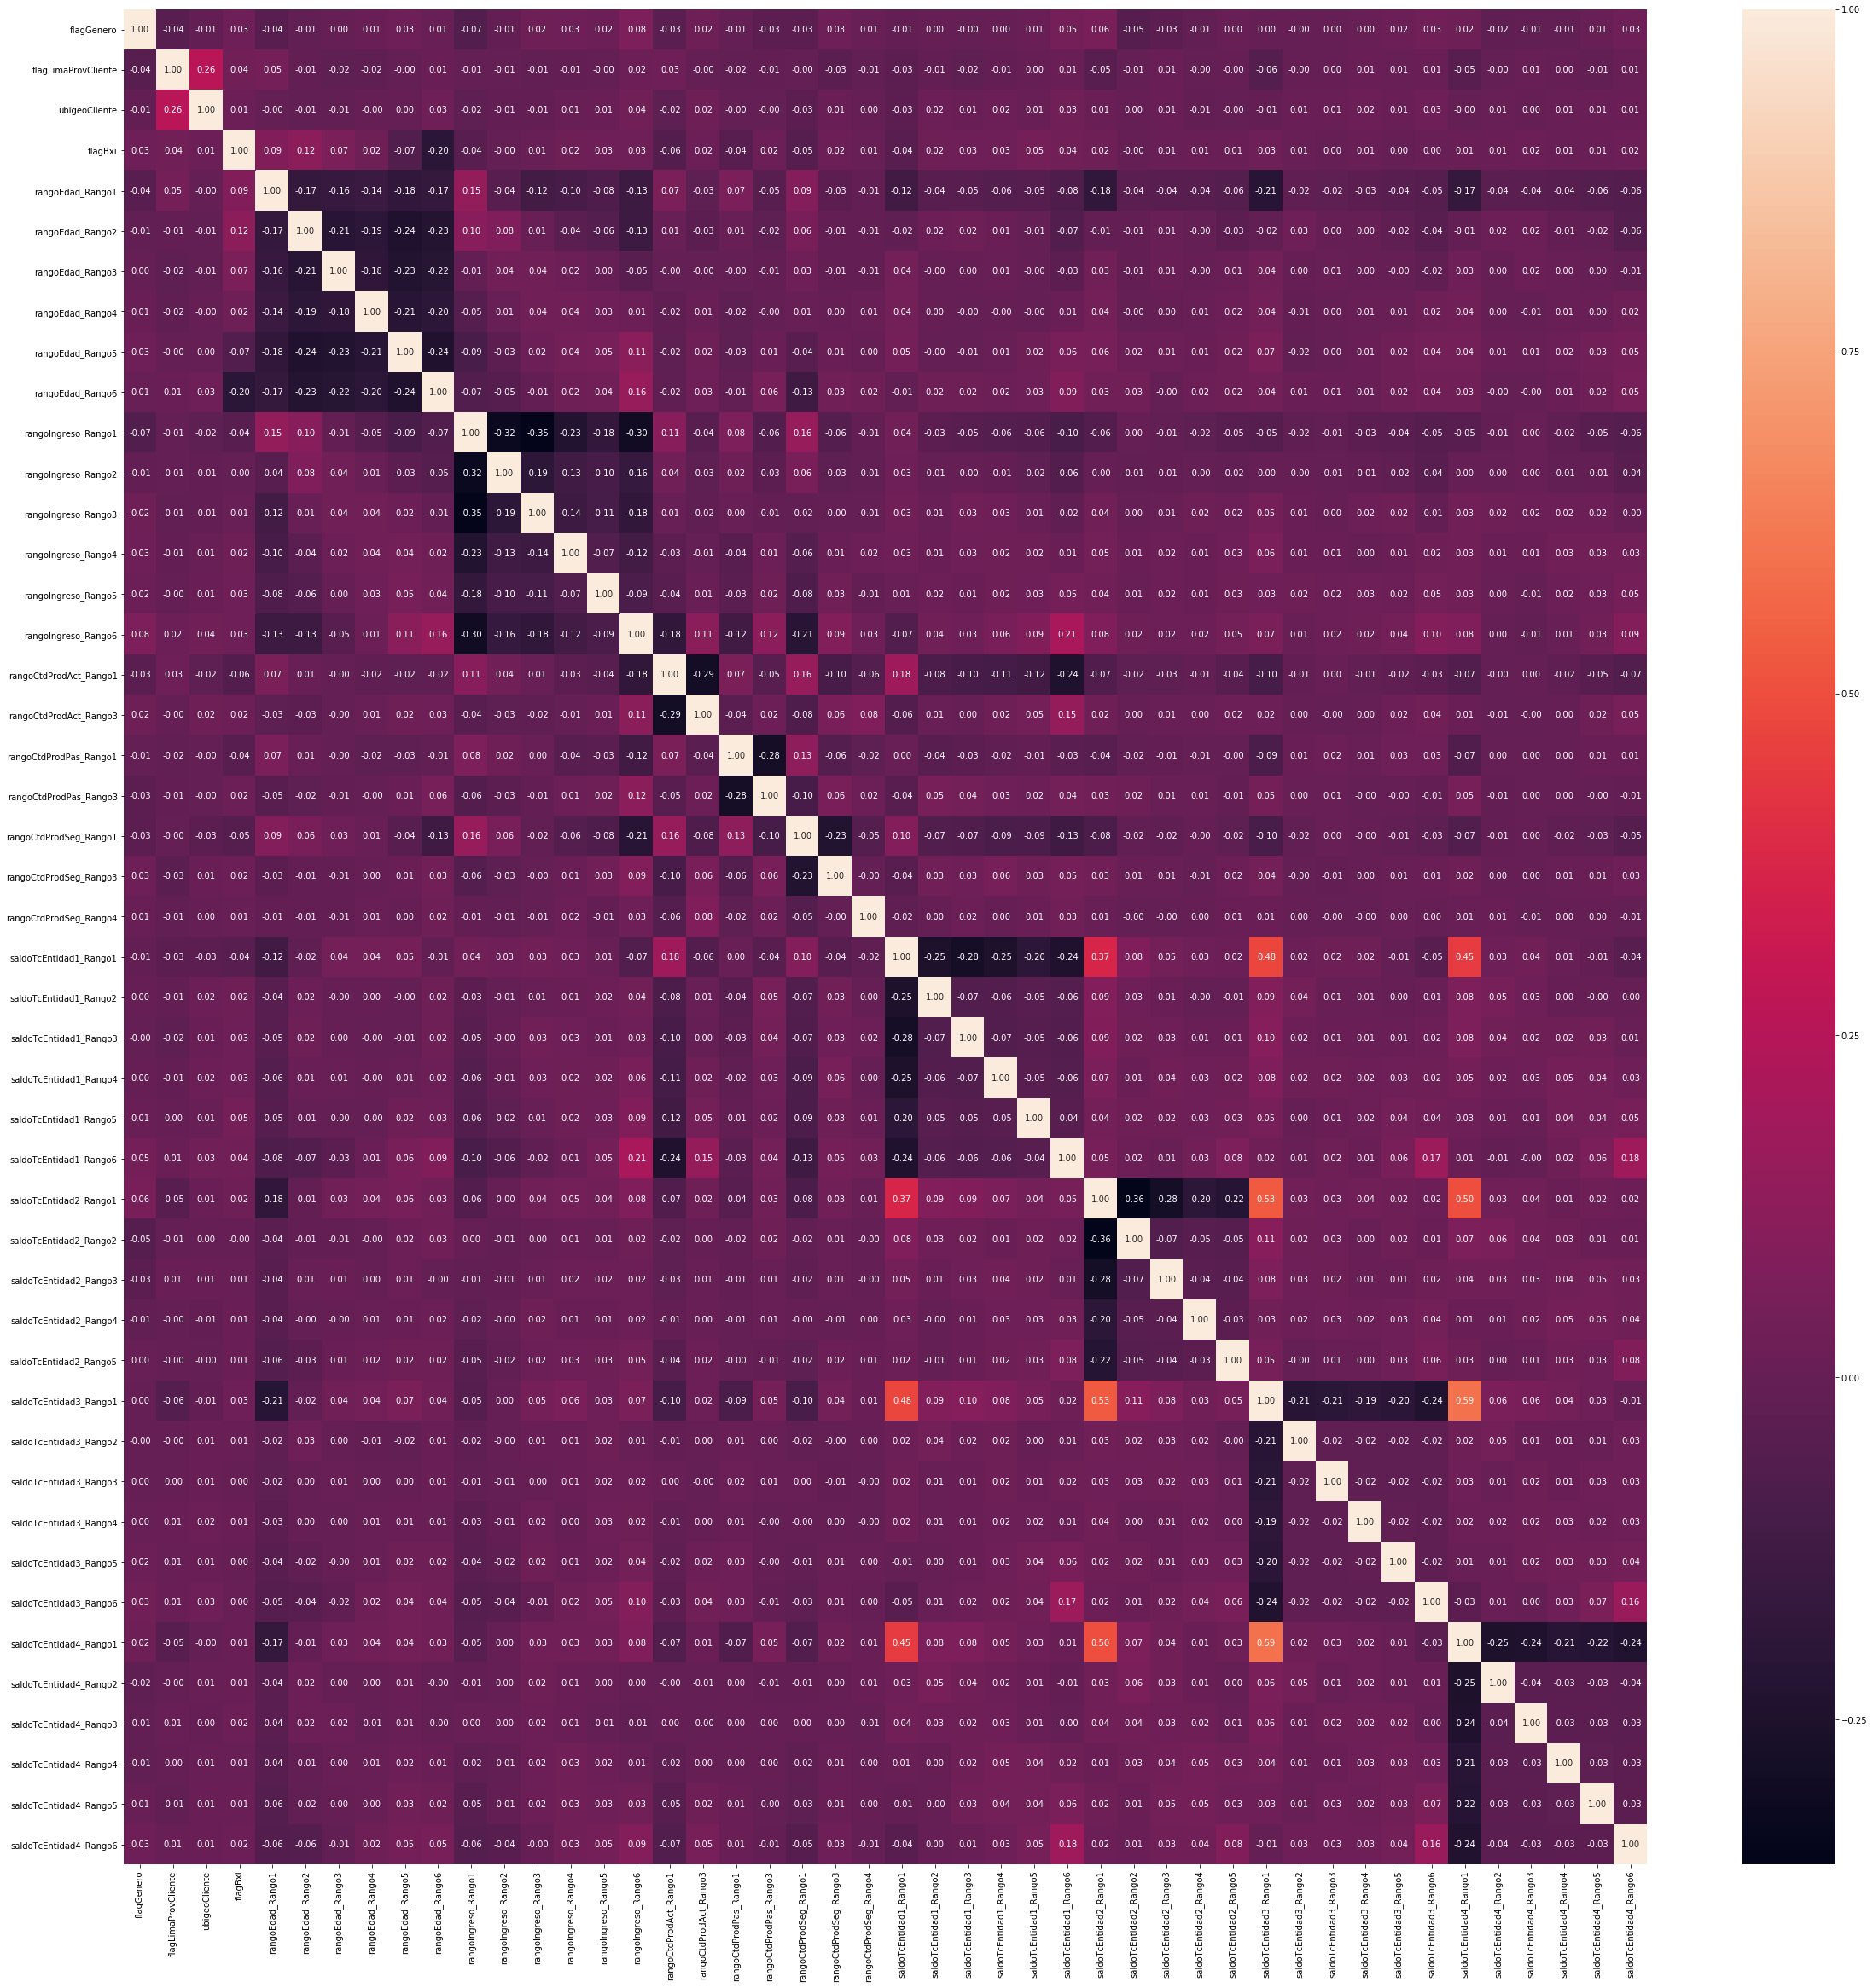

In [48]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(data_perfil.iloc[:,1:].corr('spearman'), annot=True, fmt=".2f", ax=ax)

In [ ]:
"""
GRAFICA DE CORRELACION GRAFICA 1 X 1
sns.pairplot(data_perfil.iloc[:,1:], kind="scatter")  
"""

In [24]:
data_perfil.columns

Index(['codCliente', 'flagGenero', 'flagLimaProvCliente', 'ubigeoCliente',
       'flagBxi', 'rangoEdad_Rango1', 'rangoEdad_Rango2', 'rangoEdad_Rango3',
       'rangoEdad_Rango4', 'rangoEdad_Rango5', 'rangoEdad_Rango6',
       'rangoIngreso_Rango1', 'rangoIngreso_Rango2', 'rangoIngreso_Rango3',
       'rangoIngreso_Rango4', 'rangoIngreso_Rango5', 'rangoIngreso_Rango6',
       'rangoCtdProdAct_Rango1', 'rangoCtdProdAct_Rango3',
       'rangoCtdProdPas_Rango1', 'rangoCtdProdPas_Rango3',
       'rangoCtdProdSeg_Rango1', 'rangoCtdProdSeg_Rango3',
       'rangoCtdProdSeg_Rango4', 'saldoTcEntidad1_Rango1',
       'saldoTcEntidad1_Rango2', 'saldoTcEntidad1_Rango3',
       'saldoTcEntidad1_Rango4', 'saldoTcEntidad1_Rango5',
       'saldoTcEntidad1_Rango6', 'saldoTcEntidad2_Rango1',
       'saldoTcEntidad2_Rango2', 'saldoTcEntidad2_Rango3',
       'saldoTcEntidad2_Rango4', 'saldoTcEntidad2_Rango5',
       'saldoTcEntidad3_Rango1', 'saldoTcEntidad3_Rango2',
       'saldoTcEntidad3_Rango3', 'sald

## ANALIZANDO CLUSTER POR PERFIL

In [25]:
data_cluster = data_perfil.drop(['codCliente'], axis=1)
data_cluster.head()

flagGenero  flagLimaProvCliente  ubigeoCliente  flagBxi  rangoEdad_Rango1  \
0           1                    0            360        1                 0   
1           1                    1            260        1                 0   
2           1                    1            273        1                 0   
3           0                    1            241        1                 0   
4           1                    1            268        0                 0   

   rangoEdad_Rango2  rangoEdad_Rango3  rangoEdad_Rango4  rangoEdad_Rango5  \
0                 1                 0                 0                 0   
1                 0                 0                 1                 0   
2                 1                 0                 0                 0   
3                 0                 0                 0                 1   
4                 0                 1                 0                 0   

   rangoEdad_Rango6           ...            saldoTcEntidad3_Rango3  \
0                 0           ...                                 0   
1                 0           ...                                 0   
2                 0           ...                                 0   
3                 0           ...                                 0   
4                 0           ...                                 0   

   saldoTcEntidad3_Rango4  saldoTcEntidad3_Rango5  saldoTcEntidad3_Rango6  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   saldoTcEntidad4_Rango1  saldoTcEntidad4_Rango2  saldoTcEntidad4_Rango3  \
0                       0                       0                       0   
1                       1                       0                       0   
2                       1                       0                       0   
3                       0                       1                       0   
4                       0                       0                       0   

   saldoTcEntidad4_Rango4  saldoTcEntidad4_Rango5  saldoTcEntidad4_Rango6  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
3                       0                       0                       0  
4                       0                       0                       0  

[5 rows x 46 columns]

In [26]:
data_perfil.shape, data_cluster.shape

((30000, 47), (30000, 46))

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_cluster)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
scaler_data = scaler.transform(data_cluster)

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
def simple_get_siluet_score(X):
    for n_clusters in range(2, 20):
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels, sample_size=300)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

In [54]:
simple_get_siluet_score(scaler_data)

For n_clusters = 2 The average silhouette_score is : 0.08676554159261185
For n_clusters = 3 The average silhouette_score is : 0.03149254902858689
For n_clusters = 4 The average silhouette_score is : 0.03927150660159025
For n_clusters = 5 The average silhouette_score is : 0.06652276604751481
For n_clusters = 6 The average silhouette_score is : 0.03636699616965637
For n_clusters = 7 The average silhouette_score is : 0.043179186789509556
For n_clusters = 8 The average silhouette_score is : 0.057444079960049875
For n_clusters = 9 The average silhouette_score is : 0.0468726261603023
For n_clusters = 10 The average silhouette_score is : 0.056770847124525875
For n_clusters = 11 The average silhouette_score is : 0.07468919480867382
For n_clusters = 12 The average silhouette_score is : 0.0875979131994749
For n_clusters = 13 The average silhouette_score is : 0.06959965903600872
For n_clusters = 14 The average silhouette_score is : 0.08755357371717462
For n_clusters = 15 The average silhouette_sc

In [55]:
def get_inertia(X):
    cluster_range = range( 2, 20 )
    list_intertia = []
    for num_clusters in cluster_range:
        clusters_km = KMeans(num_clusters)
        clusters_km.fit(X)
        list_intertia.append(clusters_km.inertia_)
        
    clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "list_intertia": list_intertia } )
    plt.figure(figsize=(15,5))
    plt.plot( clusters_df.num_clusters, clusters_df.list_intertia, marker = "o" )

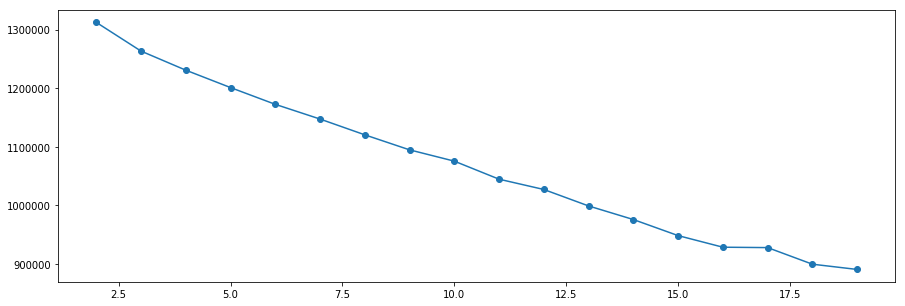

In [56]:
get_inertia(scaler_data)

In [30]:
#Pasando Dataframe Pandas to DataFrame Spark

#Detectando instalacion
import findspark
findspark.init('/opt/spark')

#Levantando sesion
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('victor_bbva').getOrCreate()

In [31]:
spark_df = spark.createDataFrame(data_perfil)

In [32]:
print(spark_df.columns[1:])

['flagGenero', 'flagLimaProvCliente', 'ubigeoCliente', 'flagBxi', 'rangoEdad_Rango1', 'rangoEdad_Rango2', 'rangoEdad_Rango3', 'rangoEdad_Rango4', 'rangoEdad_Rango5', 'rangoEdad_Rango6', 'rangoIngreso_Rango1', 'rangoIngreso_Rango2', 'rangoIngreso_Rango3', 'rangoIngreso_Rango4', 'rangoIngreso_Rango5', 'rangoIngreso_Rango6', 'rangoCtdProdAct_Rango1', 'rangoCtdProdAct_Rango3', 'rangoCtdProdPas_Rango1', 'rangoCtdProdPas_Rango3', 'rangoCtdProdSeg_Rango1', 'rangoCtdProdSeg_Rango3', 'rangoCtdProdSeg_Rango4', 'saldoTcEntidad1_Rango1', 'saldoTcEntidad1_Rango2', 'saldoTcEntidad1_Rango3', 'saldoTcEntidad1_Rango4', 'saldoTcEntidad1_Rango5', 'saldoTcEntidad1_Rango6', 'saldoTcEntidad2_Rango1', 'saldoTcEntidad2_Rango2', 'saldoTcEntidad2_Rango3', 'saldoTcEntidad2_Rango4', 'saldoTcEntidad2_Rango5', 'saldoTcEntidad3_Rango1', 'saldoTcEntidad3_Rango2', 'saldoTcEntidad3_Rango3', 'saldoTcEntidad3_Rango4', 'saldoTcEntidad3_Rango5', 'saldoTcEntidad3_Rango6', 'saldoTcEntidad4_Rango1', 'saldoTcEntidad4_Rango2', 

In [33]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=spark_df.columns[1:], outputCol="features")
assem_data = assembler.transform(spark_df)

In [34]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)
scaler_model = scaler.fit(assem_data)
scaled_data = scaler_model.transform(assem_data)

In [35]:
scaled_data.show(5)

+----------+----------+-------------------+-------------+-------+----------------+----------------+----------------+----------------+----------------+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+--------------------+--

In [36]:
import numpy as np
import pandas as pd
from pyspark.ml.clustering import KMeans

def analysis_cost(name_col):
    cost = np.zeros(20)
    for k in range(2,20):
        kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol(name_col)
        model = kmeans.fit(scaled_data.sample(False,0.5, seed=42))
        cost[k] = model.computeCost(scaled_data) # requires Spark 2.0 or later
    fig, ax = plt.subplots(1,1, figsize =(14,6))
    ax.plot(range(2,20),cost[2:20])
    ax.set_xlabel('k')
    ax.set_ylabel('cost')

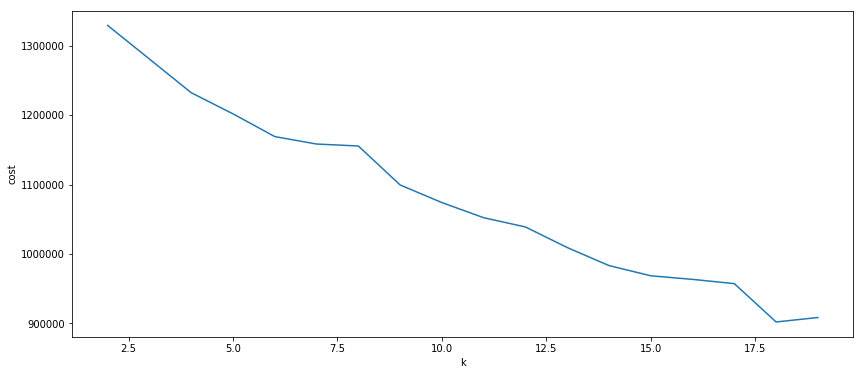

In [65]:
analysis_cost('scaled_features')

# APLICANDO CLUSTERING

In [37]:
from pyspark.ml.clustering import KMeans
list_num_clusters = [6,7,8,9,10]

def set_name(num):
    return "cluster_{}".format(num)

for clusters in list_num_clusters:
    kmeans = KMeans()\
             .setK(clusters)\
             .setMaxIter(1000)\
             .setFeaturesCol("scaled_features")\
             .setPredictionCol(set_name(clusters))

    model = kmeans.fit(scaled_data)
    scaled_data = model.transform(scaled_data)
    
data_perfil_cluster = scaled_data.toPandas()[['scaled_features', *[set_name(_) for _ in list_num_clusters]]]
data_perfil_cluster.head(5)

scaled_features  cluster_6  cluster_7  \
0  [0.9070800960466853, -1.9053144563155655, 1.57...          1          1   
1  [0.9070800960466853, 0.524830252220082, 0.2970...          5          5   
2  [0.9070800960466853, 0.524830252220082, 0.4628...          5          6   
3  [-1.1024017294887272, 0.524830252220082, 0.054...          5          5   
4  [0.9070800960466853, 0.524830252220082, 0.3991...          1          1   

   cluster_8  cluster_9  cluster_10  
0          1          5           1  
1          5          1           5  
2          6          3           3  
3          7          8           8  
4          1          5           1

In [38]:
data_perfil_cluster['scaled_features'].apply(lambda x: x[0])[:5]

0    0.907080
1    0.907080
2    0.907080
3   -1.102402
4    0.907080
Name: scaled_features, dtype: float64

In [39]:
for num_ord in range(data_perfil_cluster['scaled_features'][0].shape[0]):
    data_perfil_cluster[num_ord] = data_perfil_cluster['scaled_features'].apply(lambda x: x[num_ord])

del data_perfil_cluster['scaled_features']
data_perfil_cluster.head(5)

cluster_6  cluster_7  cluster_8  cluster_9  cluster_10         0         1  \
0          1          1          1          5           1  0.907080 -1.905314   
1          5          5          5          1           5  0.907080  0.524830   
2          5          6          6          3           3  0.907080  0.524830   
3          5          5          7          8           8 -1.102402  0.524830   
4          1          1          1          5           1  0.907080  0.524830   

          2         3         4    ...           36        37       38  \
0  1.572799  0.469307 -0.352453    ...    -0.138042 -0.127108 -0.13255   
1  0.297043  0.469307 -0.352453    ...    -0.138042 -0.127108 -0.13255   
2  0.462891  0.469307 -0.352453    ...    -0.138042 -0.127108 -0.13255   
3  0.054649  0.469307 -0.352453    ...    -0.138042 -0.127108 -0.13255   
4  0.399103 -2.130731 -0.352453    ...    -0.138042 -0.127108 -0.13255   

         39        40        41      42        43        44        45  
0 -0.157811 -1.305788 -0.194724 -0.1855 -0.163058 -0.167422 -0.183277  
1 -0.157811  0.765795 -0.194724 -0.1855 -0.163058 -0.167422 -0.183277  
2 -0.157811  0.765795 -0.194724 -0.1855 -0.163058 -0.167422 -0.183277  
3 -0.157811 -1.305788  5.135308 -0.1855 -0.163058 -0.167422 -0.183277  
4 -0.157811 -1.305788 -0.194724 -0.1855 -0.163058 -0.167422 -0.183277  

[5 rows x 51 columns]

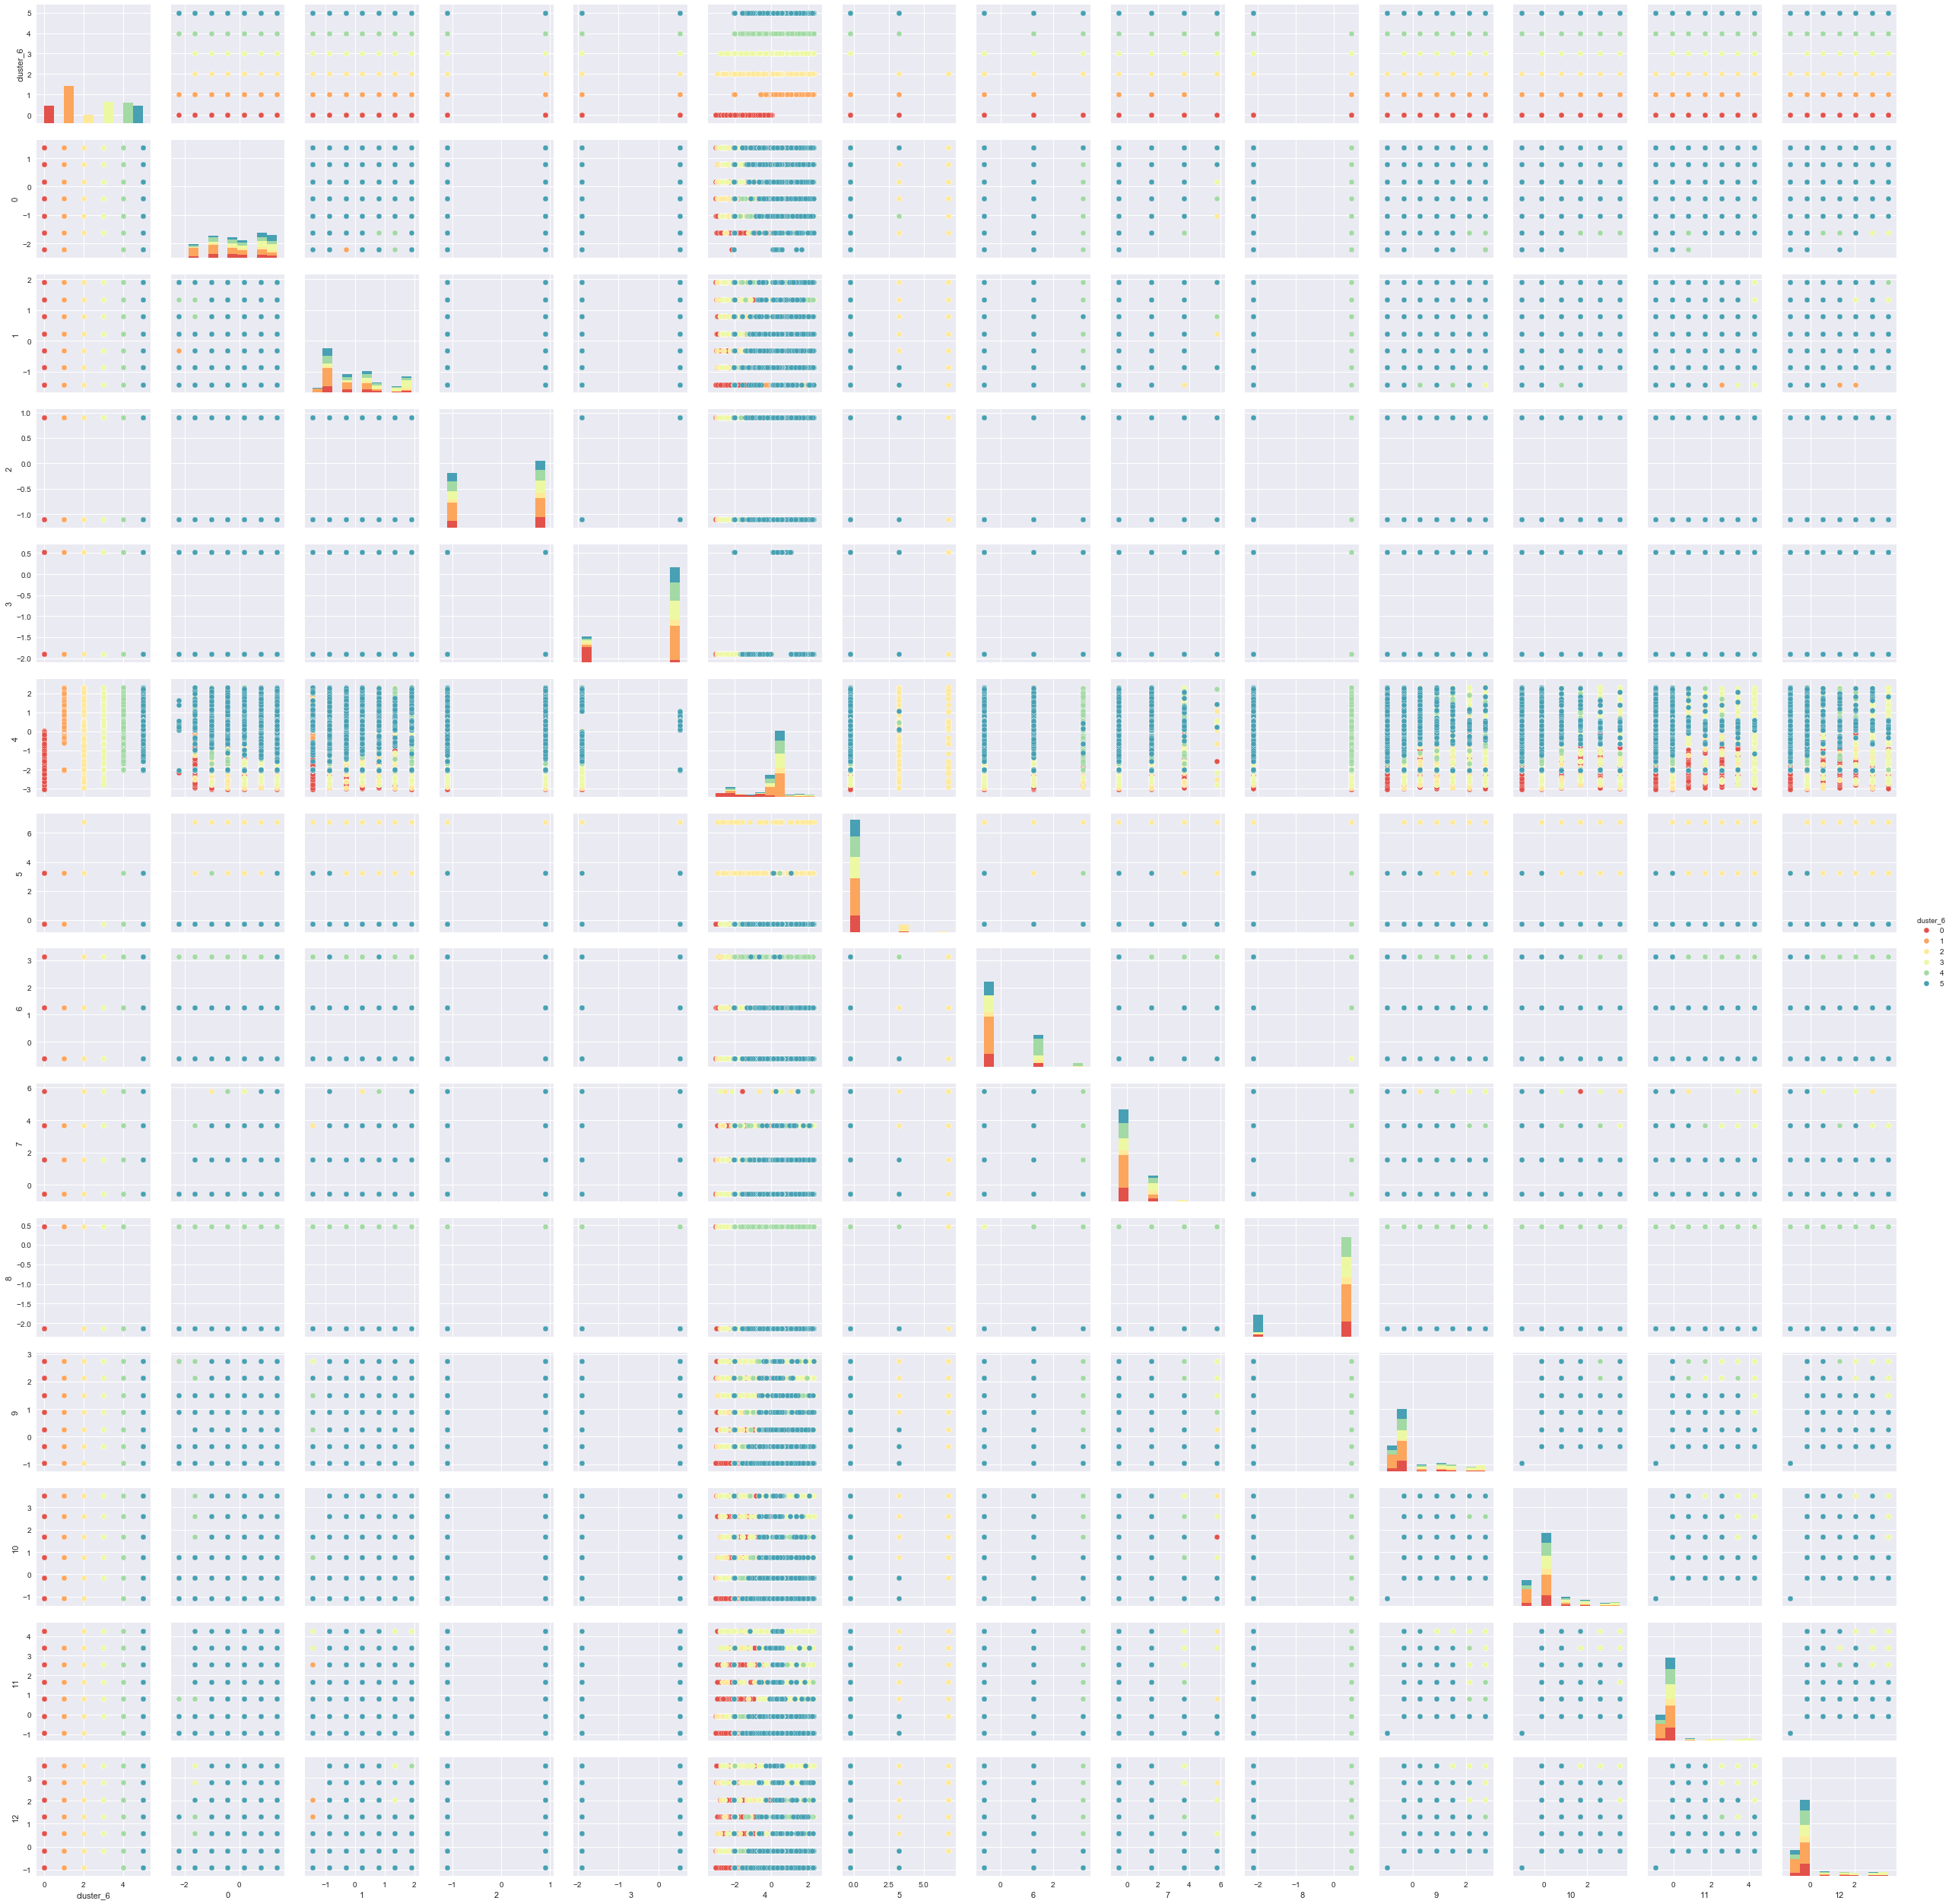

In [65]:
sns.pairplot(
    data_perfil_cluster.drop(['cluster_10', 'cluster_7', 'cluster_8', 'cluster_9'], axis=1), 
    kind="scatter",
    hue="cluster_6",
    palette="Spectral"
)

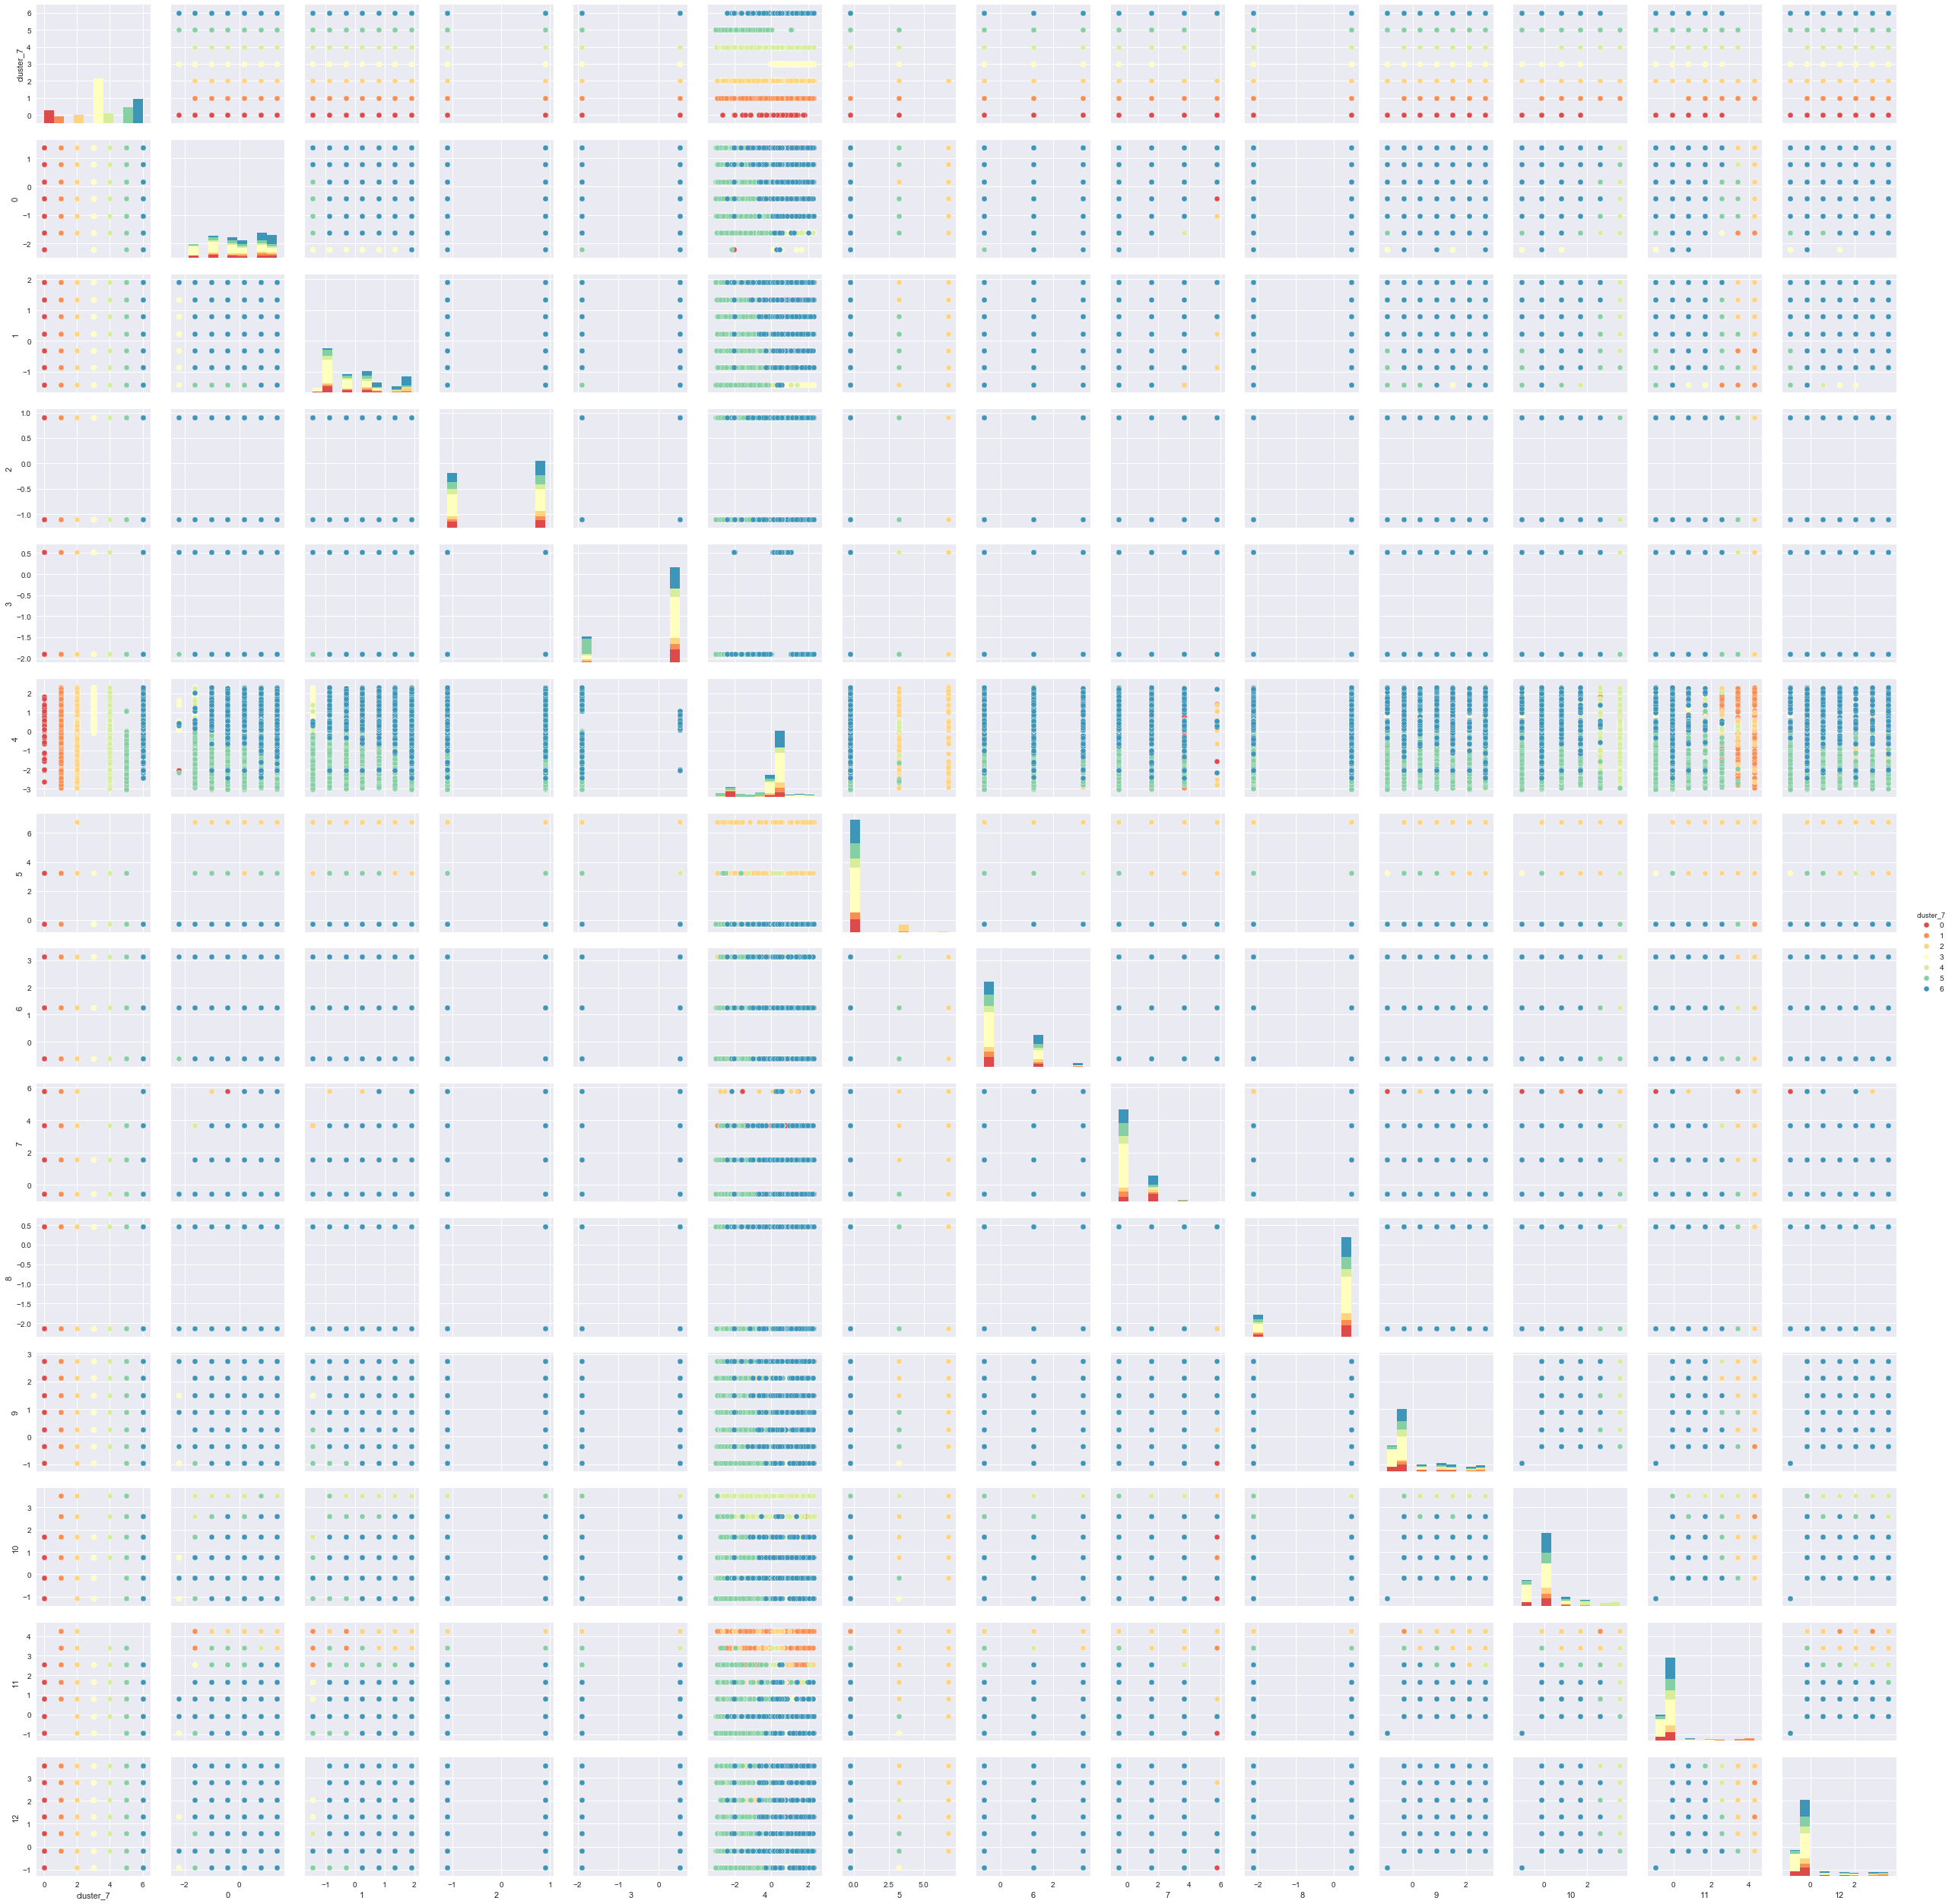

In [66]:
sns.pairplot(
    data_perfil_cluster.drop(['cluster_10', 'cluster_6', 'cluster_8', 'cluster_9'], axis=1), 
    kind="scatter",
    hue="cluster_7",
    palette="Spectral"
)

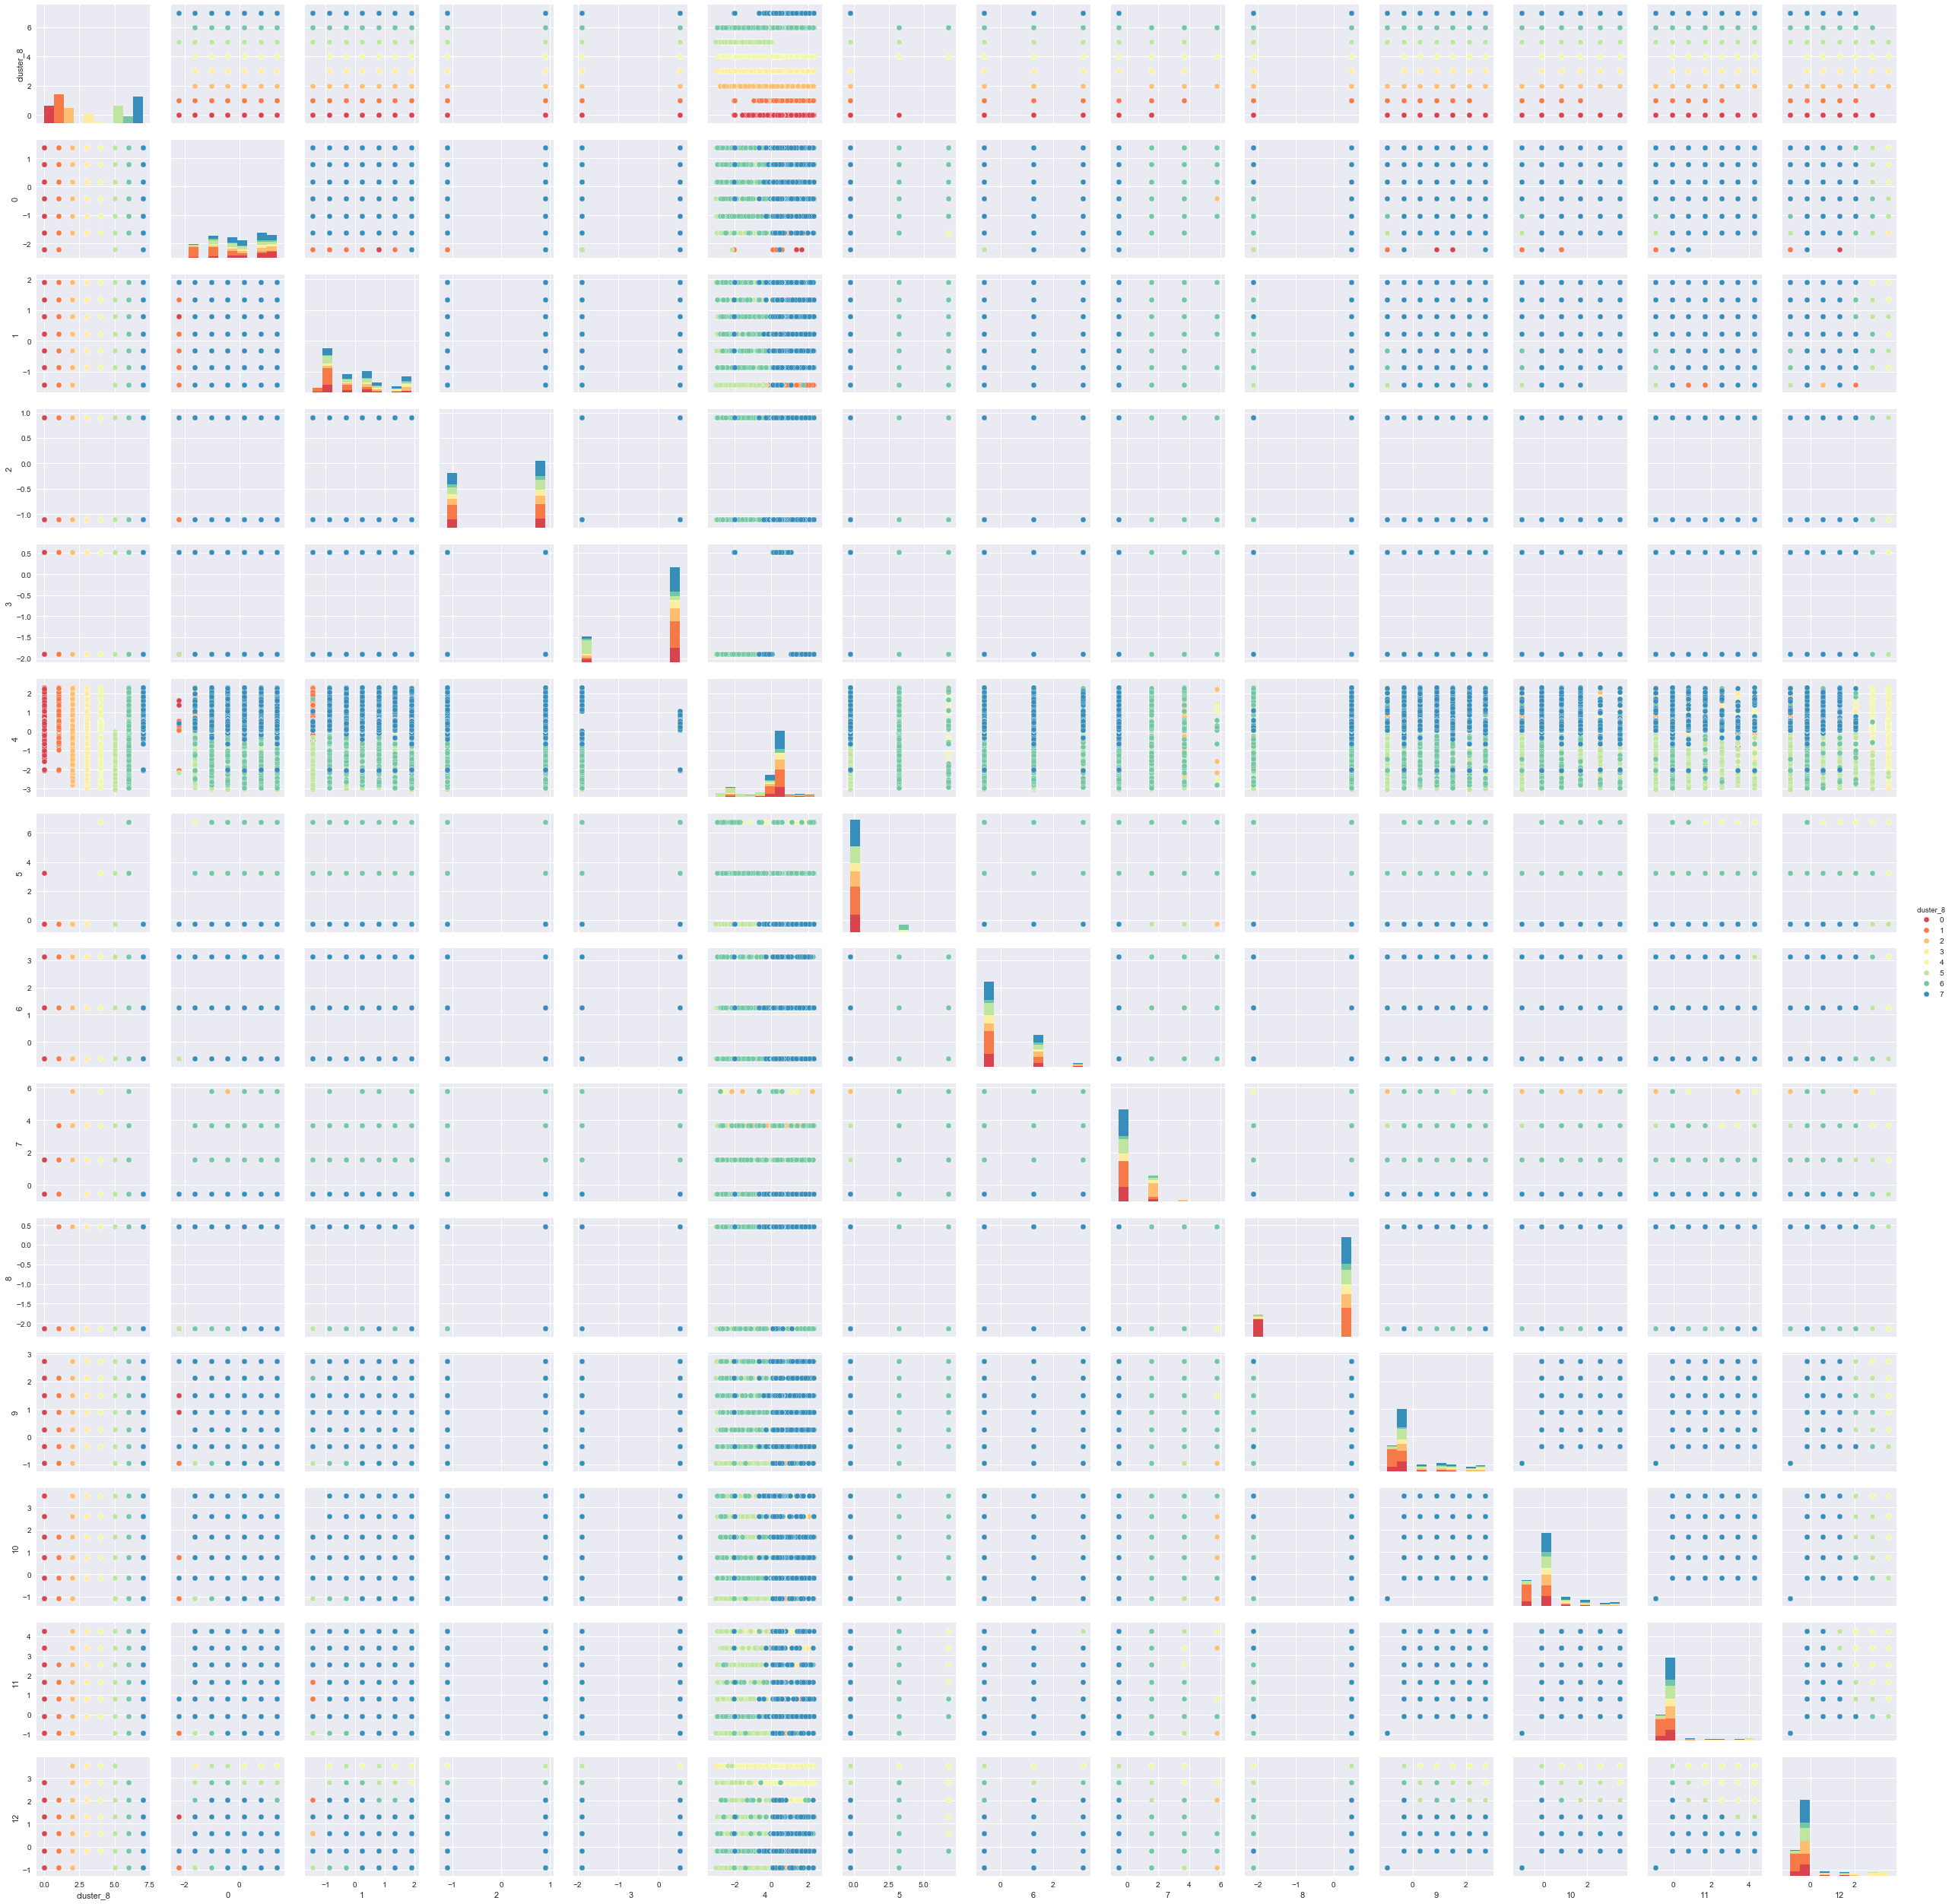

In [67]:
sns.pairplot(
    data_perfil_cluster.drop(['cluster_10', 'cluster_6', 'cluster_7', 'cluster_9'], axis=1), 
    kind="scatter",
    hue="cluster_8",
    palette="Spectral"
)

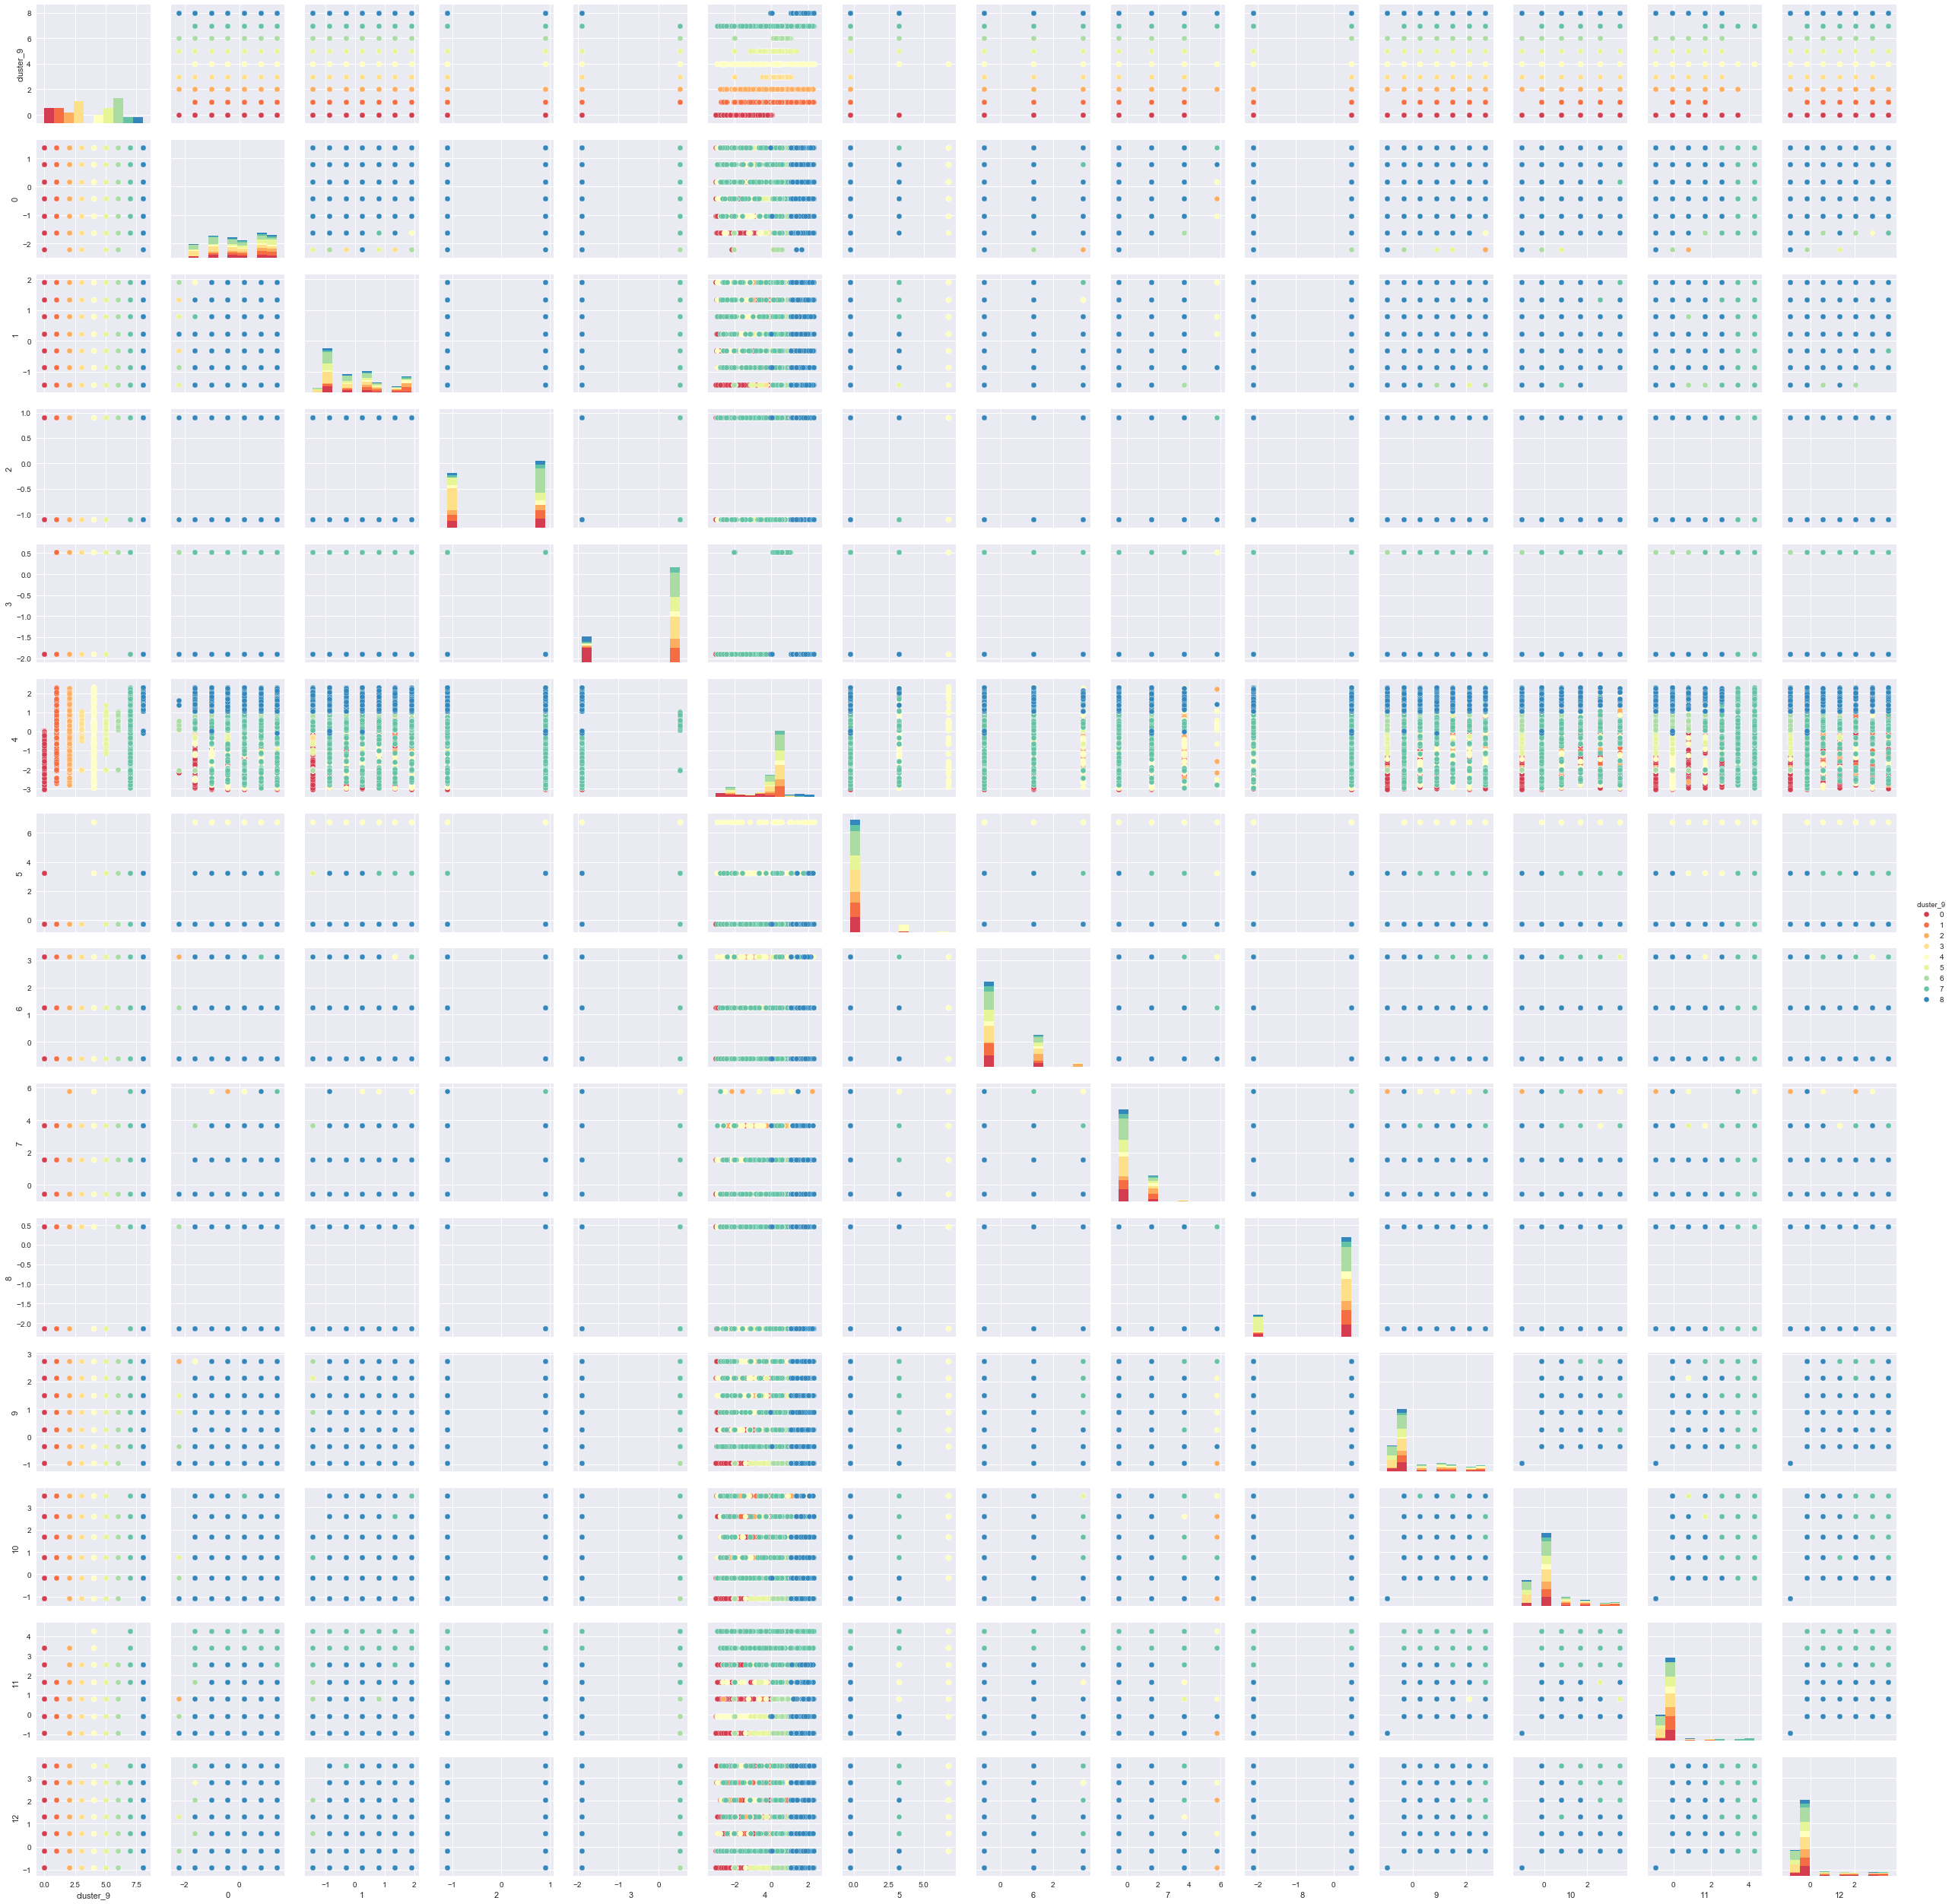

In [68]:
sns.pairplot(
    data_perfil_cluster.drop(['cluster_10', 'cluster_6', 'cluster_7', 'cluster_8'], axis=1), 
    kind="scatter",
    hue="cluster_9",
    palette="Spectral"
)

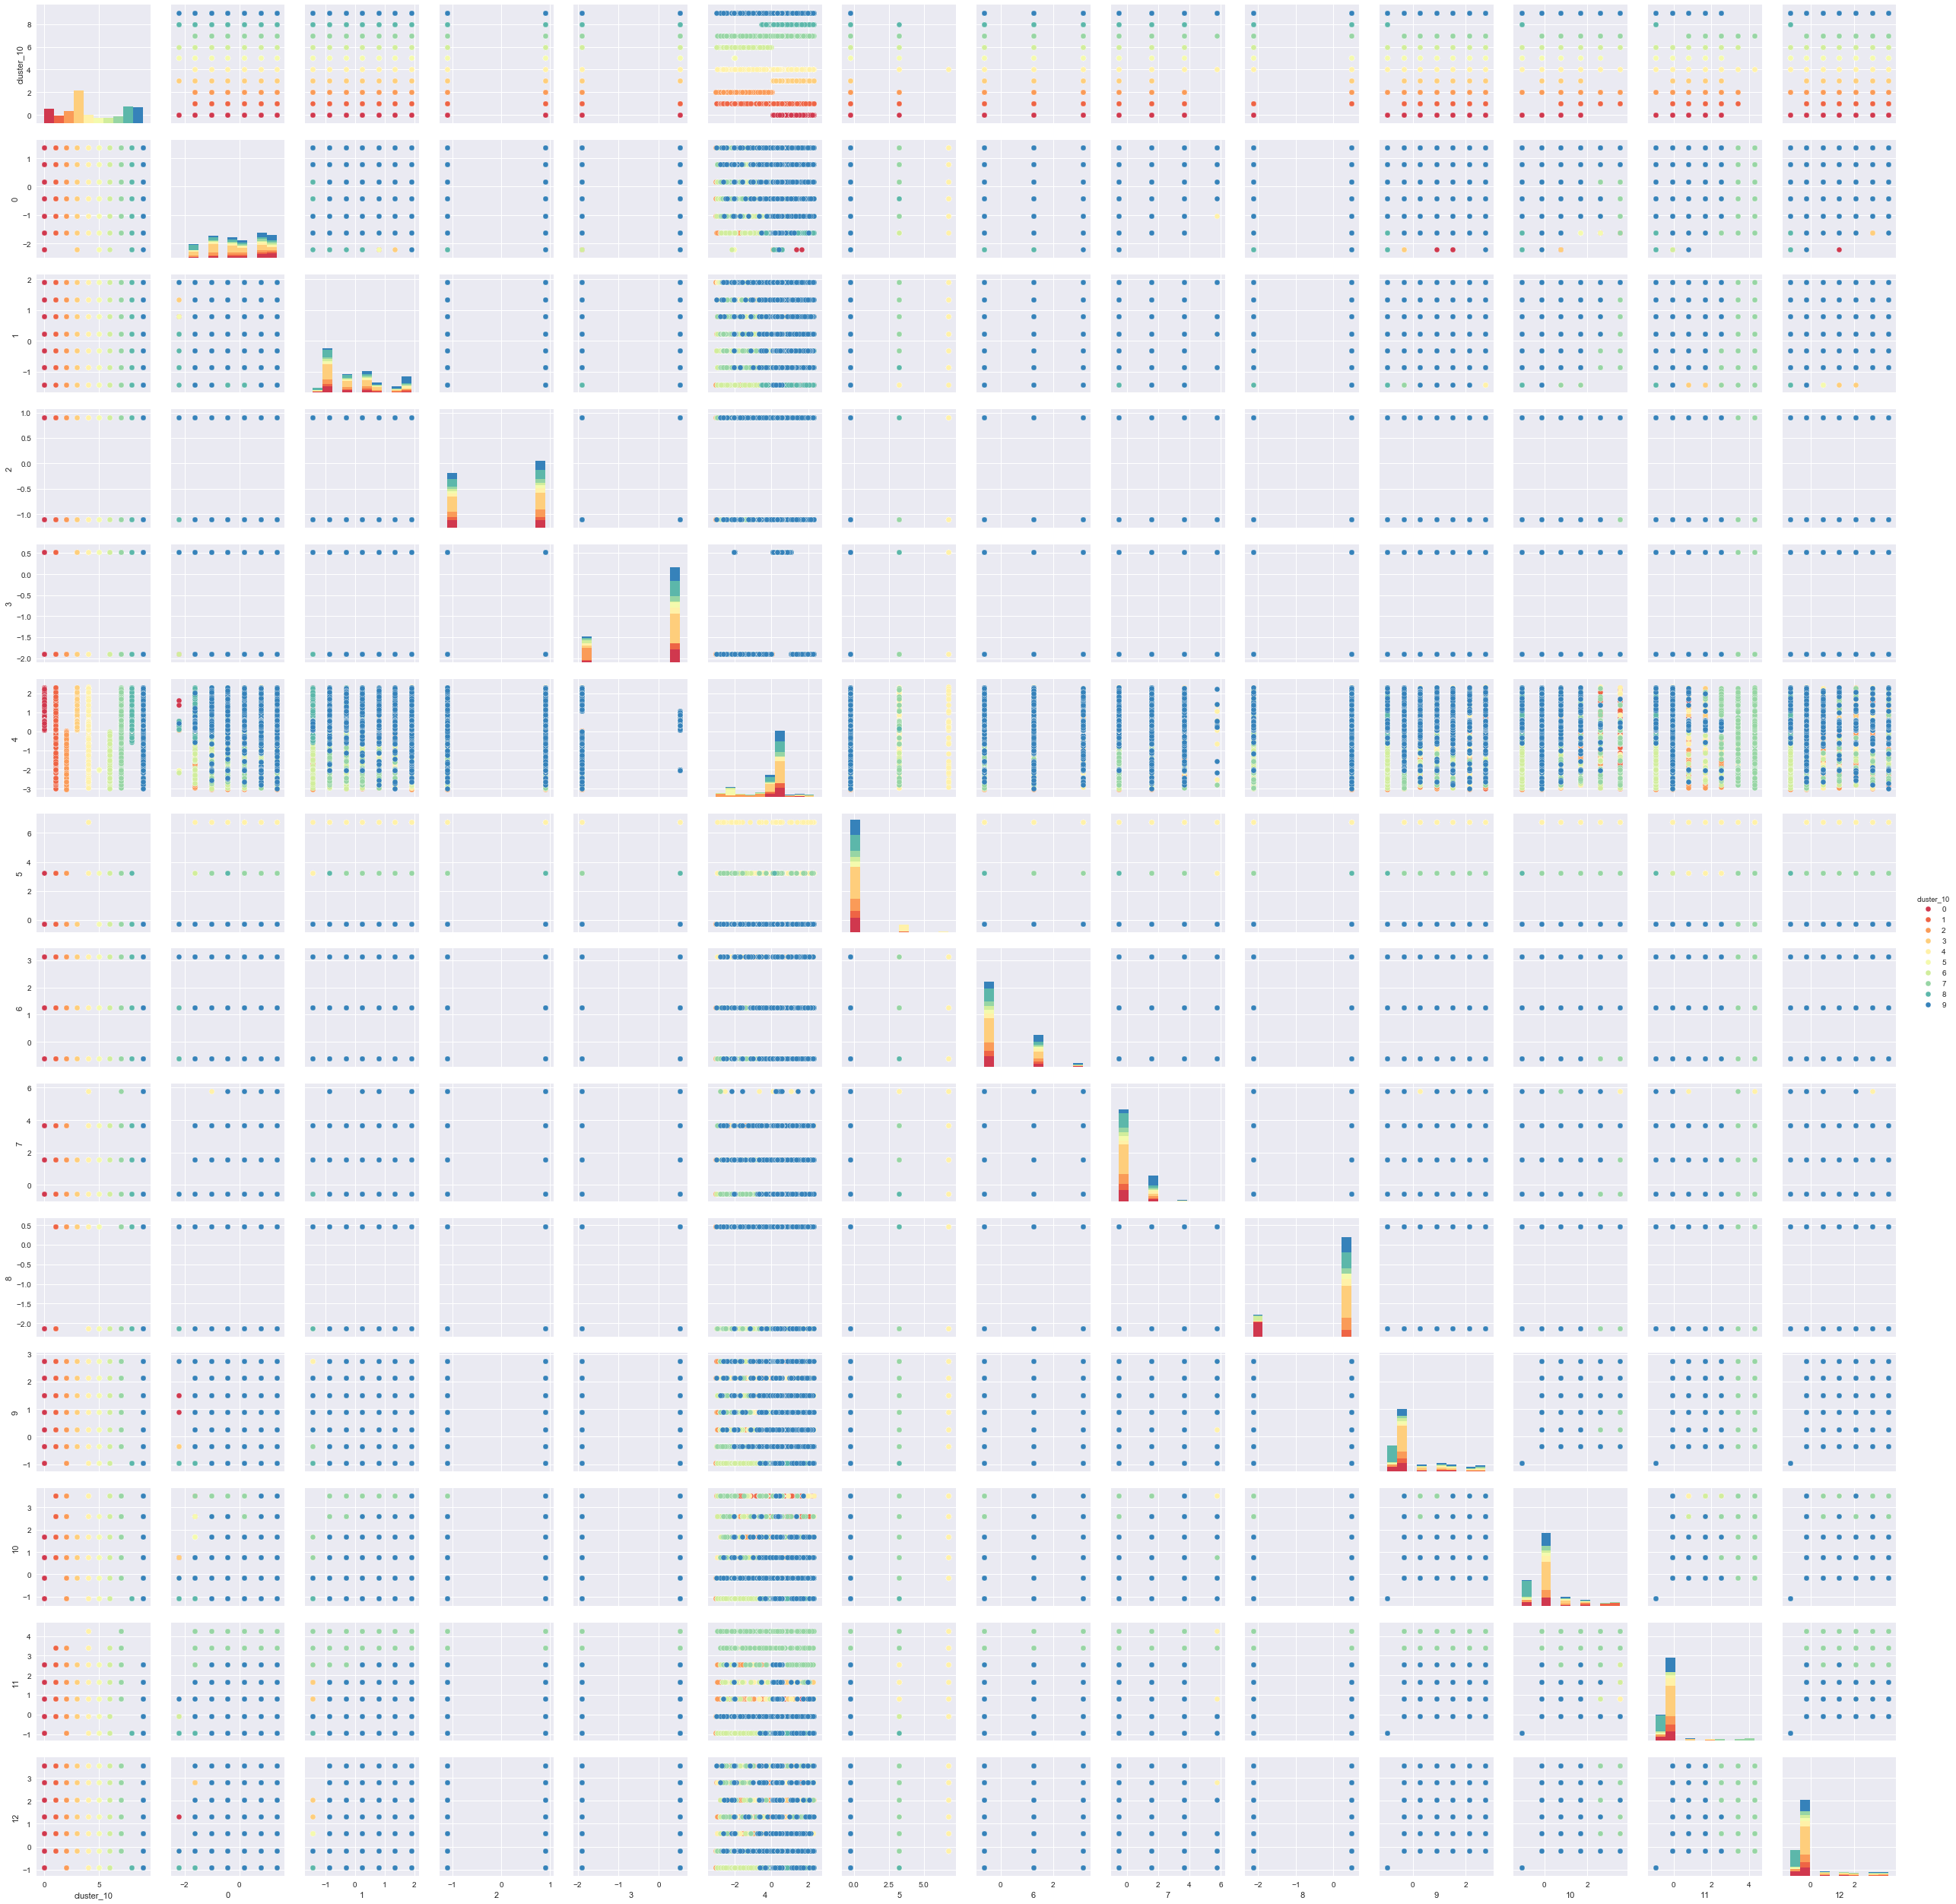

In [69]:
sns.pairplot(
    data_perfil_cluster.drop(['cluster_8', 'cluster_6', 'cluster_7', 'cluster_9'], axis=1), 
    kind="scatter",
    hue="cluster_10",
    palette="Spectral"
)

In [72]:
import mglearn
mglearn.discrete_scatter(
    data_perfil_cluster[5],
    data_perfil_cluster[4],
    data_perfil_cluster['cluster_9']
)
plt.legend(list(data_perfil_cluster['cluster_9'].unique()), loc='best')


ImportError: cannot import name 'imread'

In [40]:
data_perfil_cluster.head(5)

cluster_6  cluster_7  cluster_8  cluster_9  cluster_10         0         1  \
0          1          1          1          5           1  0.907080 -1.905314   
1          5          5          5          1           5  0.907080  0.524830   
2          5          6          6          3           3  0.907080  0.524830   
3          5          5          7          8           8 -1.102402  0.524830   
4          1          1          1          5           1  0.907080  0.524830   

          2         3         4    ...           36        37       38  \
0  1.572799  0.469307 -0.352453    ...    -0.138042 -0.127108 -0.13255   
1  0.297043  0.469307 -0.352453    ...    -0.138042 -0.127108 -0.13255   
2  0.462891  0.469307 -0.352453    ...    -0.138042 -0.127108 -0.13255   
3  0.054649  0.469307 -0.352453    ...    -0.138042 -0.127108 -0.13255   
4  0.399103 -2.130731 -0.352453    ...    -0.138042 -0.127108 -0.13255   

         39        40        41      42        43        44        45  
0 -0.157811 -1.305788 -0.194724 -0.1855 -0.163058 -0.167422 -0.183277  
1 -0.157811  0.765795 -0.194724 -0.1855 -0.163058 -0.167422 -0.183277  
2 -0.157811  0.765795 -0.194724 -0.1855 -0.163058 -0.167422 -0.183277  
3 -0.157811 -1.305788  5.135308 -0.1855 -0.163058 -0.167422 -0.183277  
4 -0.157811 -1.305788 -0.194724 -0.1855 -0.163058 -0.167422 -0.183277  

[5 rows x 51 columns]

In [41]:
data_perfil['perfil_6'] = data_perfil_cluster['cluster_6']
data_perfil['perfil_7'] = data_perfil_cluster['cluster_7']
data_perfil['perfil_8'] = data_perfil_cluster['cluster_8']
data_perfil['perfil_9'] = data_perfil_cluster['cluster_9']
data_perfil['perfil_10'] = data_perfil_cluster['cluster_10']

In [42]:
data_perfil.head()

codCliente  flagGenero  flagLimaProvCliente  ubigeoCliente  flagBxi  \
0       24041           1                    0            360        1   
1        9040           1                    1            260        1   
2       18233           1                    1            273        1   
3        7226           0                    1            241        1   
4       21617           1                    1            268        0   

   rangoEdad_Rango1  rangoEdad_Rango2  rangoEdad_Rango3  rangoEdad_Rango4  \
0                 0                 1                 0                 0   
1                 0                 0                 0                 1   
2                 0                 1                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 1                 0   

   rangoEdad_Rango5    ...      saldoTcEntidad4_Rango2  \
0                 0    ...                           0   
1                 0    ...                           0   
2                 0    ...                           0   
3                 1    ...                           1   
4                 0    ...                           0   

   saldoTcEntidad4_Rango3  saldoTcEntidad4_Rango4  saldoTcEntidad4_Rango5  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   saldoTcEntidad4_Rango6  perfil_6  perfil_7  perfil_8  perfil_9  perfil_10  
0                       0         1         1         1         5          1  
1                       0         5         5         5         1          5  
2                       0         5         6         6         3          3  
3                       0         5         5         7         8          8  
4                       0         1         1         1         5          1  

[5 rows x 52 columns]

In [43]:
pd.concat([
    data_perfil.groupby(['perfil_6'])['flagGenero'].count(),
    data_perfil.groupby(['perfil_6'])['flagGenero'].mean(),
    data_perfil.groupby(['perfil_6'])['flagGenero'].skew()
], axis=1, copy=False)

flagGenero  flagGenero  flagGenero
perfil_6                                    
0                697    0.497848    0.008627
1               6829    0.530971   -0.124149
2                182    0.681319   -0.784732
3                919    0.514690   -0.058881
4                509    0.607073   -0.439759
5              20864    0.554975   -0.221258

In [44]:
pd.concat([
    data_perfil.groupby(['perfil_6'])['flagLimaProvCliente'].count(),
    data_perfil.groupby(['perfil_6'])['flagLimaProvCliente'].mean(),
    data_perfil.groupby(['perfil_6'])['flagLimaProvCliente'].skew()
], axis=1, copy=False)

flagLimaProvCliente  flagLimaProvCliente  flagLimaProvCliente
perfil_6                                                               
0                         697             0.780488            -1.358213
1                        6829             0.826182            -1.721873
2                         182             0.769231            -1.288665
3                         919             0.793254            -1.450634
4                         509             0.805501            -1.548223
5                       20864             0.769555            -1.280282

In [91]:
data_perfil.groupby(['perfil_9'])['rangoEdad_Rango1'].value_counts()

perfil_9  rangoEdad_Rango1
0         0                   4021
          1                    129
1         0                   1406
          1                     82
2         0                   8616
          1                    962
3         0                   3604
          1                   1855
4         0                    709
          1                     23
5         0                   3573
          1                    166
6         0                    885
          1                     49
7         0                    876
          1                     28
8         0                   2995
          1                     21
Name: rangoEdad_Rango1, dtype: int64

In [45]:
data_perfil.head()

codCliente  flagGenero  flagLimaProvCliente  ubigeoCliente  flagBxi  \
0       24041           1                    0            360        1   
1        9040           1                    1            260        1   
2       18233           1                    1            273        1   
3        7226           0                    1            241        1   
4       21617           1                    1            268        0   

   rangoEdad_Rango1  rangoEdad_Rango2  rangoEdad_Rango3  rangoEdad_Rango4  \
0                 0                 1                 0                 0   
1                 0                 0                 0                 1   
2                 0                 1                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 1                 0   

   rangoEdad_Rango5    ...      saldoTcEntidad4_Rango2  \
0                 0    ...                           0   
1                 0    ...                           0   
2                 0    ...                           0   
3                 1    ...                           1   
4                 0    ...                           0   

   saldoTcEntidad4_Rango3  saldoTcEntidad4_Rango4  saldoTcEntidad4_Rango5  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   saldoTcEntidad4_Rango6  perfil_6  perfil_7  perfil_8  perfil_9  perfil_10  
0                       0         1         1         1         5          1  
1                       0         5         5         5         1          5  
2                       0         5         6         6         3          3  
3                       0         5         5         7         8          8  
4                       0         1         1         1         5          1  

[5 rows x 52 columns]

In [47]:
data_perfil.to_csv('data/clean_perfil.csv', index=False)